In [16]:
from os import listdir
import numpy as np
from collections import defaultdict
import json
import pandas as pd
from gensim import corpora, models
import gensim
from nltk.corpus import stopwords
import pickle
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

dfTrain = pd.read_pickle("dfTrainPickle.pickle")
dfValidation = pd.read_pickle("dfValidationPickle.pickle")
dfTest = pd.read_pickle("dfTestPickle.pickle")

In [11]:
#Load all stored ones from pickle
ldamodel = gensim.models.ldamodel.LdaModel.load("ldamodel_bigram_14topics.model", mmap=None)
dfTrain[['Overall', 'Cleanliness', 'Location', 'Rooms', 'Service', 'Value']] = dfTrain[['Overall', 'Cleanliness', 'Location', 'Rooms', 'Service', 'Value']].apply(pd.to_numeric)
dfValidation[['Overall', 'Cleanliness', 'Location', 'Rooms', 'Service', 'Value']] = dfValidation[['Overall', 'Cleanliness', 'Location', 'Rooms', 'Service', 'Value']].apply(pd.to_numeric)
dfTest[['Overall', 'Cleanliness', 'Location', 'Rooms', 'Service', 'Value']] = dfTest[['Overall', 'Cleanliness', 'Location', 'Rooms', 'Service', 'Value']].apply(pd.to_numeric)
corpus = gensim.corpora.MmCorpus("BOWBigramCorpus.mm")
X_train = pickle.load(open('XTrainDataBigram.p', 'rb'))
y_train = pickle.load(open('YTrainOverallBigram.p', 'rb'))
X_test = pickle.load(open('XTestDataBigram.p', 'rb'))
y_test = pickle.load(open('YTestBigram.p', 'rb'))

In [18]:
lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\w+')
en_stop = stopwords.words('english')
texts = []

'''for idx, t in dfTrain.iterrows():
    i = t['Content']
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    tokens = [x for x in tokens if not x.isnumeric()]
    tokens = [x for x in tokens if len(x) > 1]
    stopped_tokens = [x for x in tokens if not x in en_stop]
    stemmed_tokens = [lemmatizer.lemmatize(i) for i in stopped_tokens]
    final_tokens = stemmed_tokens
    
    # add tokens to list
    texts.append(final_tokens)'''

"for idx, t in dfTrain.iterrows():\n    i = t['Content']\n    # clean and tokenize document string\n    raw = i.lower()\n    tokens = tokenizer.tokenize(raw)\n    tokens = [x for x in tokens if not x.isnumeric()]\n    tokens = [x for x in tokens if len(x) > 1]\n    stopped_tokens = [x for x in tokens if not x in en_stop]\n    stemmed_tokens = [lemmatizer.lemmatize(i) for i in stopped_tokens]\n    final_tokens = stemmed_tokens\n    \n    # add tokens to list\n    texts.append(final_tokens)"

In [4]:
from gensim.models import Phrases

bigram = Phrases(texts, min_count=20, threshold=10)

for idx in range(len(texts)):
    for token in bigram[texts[idx]]:
        if '_' in token:
            texts[idx].append(token) 

print("Generated bigrams")
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_above=0.7, no_below=50)
dictionary.compactify()

corpus = [dictionary.doc2bow(text) for text in texts]
gensim.corpora.MmCorpus.serialize('BOWBigramCorpus.mm', corpus)

print("corpus construction done...")
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

C:\Users\Divya\Anaconda3\lib\site-packages\gensim\models\phrases.py:316: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


Generated bigrams
corpus construction done...
Number of unique tokens: 17528
Number of documents: 280000


In [80]:
dictionary.save('dict_bigram.dict')

INFO:gensim.utils:saving Dictionary object under dict_bigram.dict, separately None
INFO:gensim.utils:saved dict_bigram.dict


In [5]:
import logging
logging.getLogger().setLevel(logging.DEBUG)
logging.warning('Watch out!') # will print a message to the console
logging.info('I told you so')
logging.debug("dhfoudh")

ldamodel = gensim.models.ldamulticore.LdaMulticore(corpus, num_topics=14,id2word = dictionary, eval_every = None, passes=10, iterations=100)

INFO:root:I told you so
DEBUG:root:dhfoudh
INFO:gensim.models.ldamodel:using symmetric alpha at 0.07142857142857142
INFO:gensim.models.ldamodel:using symmetric eta at 5.705157462345961e-05
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 14 topics, 10 passes over the supplied corpus of 280000 documents, updating every 6000 documents, evaluating every ~0 documents, iterating 100x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 3 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/280000, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/280000, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/280000, outstanding queue size 3
INFO:gensim.models.ldamulticore:PROGRESS: pass 0,

INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #22 = documents up to #46000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #7 (0.071): 0.008*"great" + 0.008*"one" + 0.006*"time" + 0.006*"night" + 0.006*"stay" + 0.006*"stayed" + 0.006*"pool" + 0.006*"staff" + 0.005*"place" + 0.005*"good"
INFO:gensim.models.ldamodel:topic #9 (0.071): 0.017*"great" + 0.012*"stay" + 0.011*"would" + 0.008*"nice" + 0.008*"staff" + 0.007*"time" + 0.007*"night" + 0.006*"location" + 0.006*"clean" + 0.006*"one"
INFO:gensim.models.ldamodel:topic #6 (0.071): 0.010*"good" + 0.009*"nice" + 0.008*"staff" + 0.008*"breakfast" + 0.006*"great" + 0.006*"would" + 0.006*"get" + 0.005*"walk" + 0.005*"place" + 0.005*"stay"
INFO:gensim.models.ldamodel:topic #8 (0.071): 0.012*"great" + 0.010*"staff" + 0.010*"breakfast" + 0.008*"stay" + 0.008*"locati

INFO:gensim.models.ldamodel:topic #4 (0.071): 0.010*"night" + 0.010*"great" + 0.009*"location" + 0.009*"good" + 0.008*"staff" + 0.008*"nice" + 0.007*"one" + 0.007*"stayed" + 0.007*"stay" + 0.007*"would"
INFO:gensim.models.ldamodel:topic #11 (0.071): 0.015*"nice" + 0.013*"stay" + 0.011*"staff" + 0.011*"good" + 0.010*"place" + 0.010*"would" + 0.010*"clean" + 0.009*"great" + 0.008*"location" + 0.007*"area"
INFO:gensim.models.ldamodel:topic #5 (0.071): 0.010*"u" + 0.010*"stay" + 0.010*"night" + 0.009*"would" + 0.008*"time" + 0.008*"get" + 0.007*"one" + 0.006*"check" + 0.006*"great" + 0.006*"pool"
INFO:gensim.models.ldamodel:topic diff=0.190977, rho=0.188982
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #36 = documents up to #74000/280000, outstanding queue size 7
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #37 = documents up to #76000/280000, outstanding queue size 8
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #38 = documen

INFO:gensim.models.ldamodel:topic #11 (0.071): 0.017*"nice" + 0.014*"stay" + 0.013*"staff" + 0.012*"clean" + 0.012*"good" + 0.011*"would" + 0.011*"place" + 0.010*"great" + 0.009*"location" + 0.008*"friendly"
INFO:gensim.models.ldamodel:topic #1 (0.071): 0.010*"bed" + 0.010*"good" + 0.009*"staff" + 0.009*"breakfast" + 0.008*"would" + 0.008*"clean" + 0.007*"small" + 0.007*"one" + 0.007*"location" + 0.007*"stay"
INFO:gensim.models.ldamodel:topic diff=0.160176, rho=0.152499
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #52 = documents up to #106000/280000, outstanding queue size 8
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #53 = documents up to #108000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #54 = documents up to #110000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 doc

INFO:gensim.models.ldamodel:topic diff=0.140013, rho=0.131306
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #66 = documents up to #134000/280000, outstanding queue size 7
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #67 = documents up to #136000/280000, outstanding queue size 8
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #68 = documents up to #138000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #69 = documents up to #140000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #7 (0.071): 0.013*"strip" + 0.011*"great" + 0.010*"casino" + 0.010*"vega" + 0.007*"pool" + 0.007*"time" + 0.007*"good" + 0.007*"one" + 0.006*"stay" + 0.006*"stayed"
INFO:gensim.models.ldamodel:topic #0 (0.071): 0.020*"great" + 0.014*"staff" +

INFO:gensim.models.ldamodel:topic diff=0.125038, rho=0.117041
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #83 = documents up to #168000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #84 = documents up to #170000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #5 (0.071): 0.013*"u" + 0.010*"would" + 0.010*"check" + 0.010*"night" + 0.009*"stay" + 0.008*"time" + 0.008*"get" + 0.008*"day" + 0.008*"one" + 0.006*"desk"
INFO:gensim.models.ldamodel:topic #3 (0.071): 0.011*"pool" + 0.009*"great" + 0.009*"stay" + 0.009*"area" + 0.008*"nice" + 0.007*"clean" + 0.007*"stayed" + 0.006*"staff" + 0.006*"beach" + 0.006*"place"
INFO:gensim.models.ldamodel:topic #9 (0.071): 0.026*"great" + 0.018*"stay" + 0.016*"staff" + 0.015*"time" + 0.015*"location" + 0.013*"would" + 0

INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #99 = documents up to #200000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #13 (0.071): 0.017*"staff" + 0.014*"stay" + 0.012*"u" + 0.007*"great" + 0.007*"time" + 0.007*"service" + 0.006*"wonderful" + 0.006*"day" + 0.006*"stayed" + 0.006*"one"
INFO:gensim.models.ldamodel:topic #10 (0.071): 0.012*"service" + 0.009*"view" + 0.009*"pool" + 0.009*"great" + 0.008*"suite" + 0.008*"stay" + 0.008*"one" + 0.007*"stayed" + 0.007*"time" + 0.007*"would"
INFO:gensim.models.ldamodel:topic #5 (0.071): 0.014*"u" + 0.010*"would" + 0.010*"check" + 0.010*"night" + 0.009*"stay" + 0.008*"day" + 0.008*"get" + 0.008*"time" + 0.008*"one" + 0.006*"desk"
INFO:gensim.models.ldamodel:topic #0 (0.071): 0.020*"great" + 0.015*"staff" + 0.012*"service" + 0.011*"location" + 0.011*"good" + 0.0

DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #13 (0.071): 0.017*"staff" + 0.014*"stay" + 0.012*"u" + 0.007*"service" + 0.007*"time" + 0.007*"great" + 0.006*"day" + 0.006*"stayed" + 0.006*"wonderful" + 0.006*"one"
INFO:gensim.models.ldamodel:topic #8 (0.071): 0.012*"staff" + 0.011*"breakfast" + 0.010*"paris" + 0.010*"location" + 0.010*"good" + 0.009*"walk" + 0.009*"night" + 0.009*"great" + 0.008*"clean" + 0.008*"would"
INFO:gensim.models.ldamodel:topic #7 (0.071): 0.016*"strip" + 0.014*"vega" + 0.013*"casino" + 0.010*"great" + 0.008*"good" + 0.008*"pool" + 0.007*"time" + 0.007*"stay" + 0.006*"one" + 0.006*"get"
INFO:gensim.models.ldamodel:topic #2 (0.071): 0.009*"night" + 0.009*"floor" + 0.008*"one" + 0.008*"u" + 0.007*"would" + 0.007*"get" + 0.006*"time" + 0.006*"could" + 0.006*"door" + 0.006*"desk"
INFO:gensim.models.ldamodel:topic #9 (0.071): 0.026*"great

INFO:gensim.models.ldamodel:topic #1 (0.071): 0.014*"bed" + 0.011*"bathroom" + 0.010*"shower" + 0.008*"one" + 0.008*"small" + 0.008*"breakfast" + 0.007*"would" + 0.007*"good" + 0.006*"night" + 0.006*"stay"
INFO:gensim.models.ldamodel:topic #2 (0.071): 0.010*"night" + 0.009*"floor" + 0.009*"one" + 0.008*"u" + 0.007*"would" + 0.007*"door" + 0.007*"get" + 0.007*"could" + 0.006*"time" + 0.006*"desk"
INFO:gensim.models.ldamodel:topic #11 (0.071): 0.019*"stay" + 0.018*"place" + 0.017*"nice" + 0.016*"good" + 0.015*"staff" + 0.013*"would" + 0.013*"clean" + 0.012*"location" + 0.011*"star" + 0.010*"like"
INFO:gensim.models.ldamodel:topic #9 (0.071): 0.023*"great" + 0.019*"stay" + 0.017*"time" + 0.017*"location" + 0.016*"staff" + 0.014*"would" + 0.012*"clean" + 0.011*"york" + 0.011*"new_york" + 0.011*"new"
INFO:gensim.models.ldamodel:topic #8 (0.071): 0.012*"staff" + 0.011*"breakfast" + 0.011*"location" + 0.011*"paris" + 0.010*"good" + 0.009*"night" + 0.009*"walk" + 0.008*"would" + 0.008*"metro" 

INFO:gensim.models.ldamodel:topic diff=0.082492, rho=0.085749
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 4000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #7 (0.071): 0.018*"vega" + 0.015*"strip" + 0.015*"casino" + 0.008*"time" + 0.008*"stay" + 0.007*"great" + 0.007*"pool" + 0.007*"get" + 0.007*"good" + 0.007*"la"
INFO:gensim.models.ldamodel:topic #3 (0.071): 0.013*"pool" + 0.009*"area" + 0.009*"stay" + 0.008*"parking" + 0.007*"nice" + 0.007*"great" + 0.007*"place" + 0.006*"stayed" + 0.006*"san" + 0.006*"one"
INFO:gensim.models.ldamodel:topic #8 (0.071): 0.012*"breakfast" + 0.011*"staff" + 0.011*"location" + 0.011*"paris" + 0.010*"good" + 0.010*"night" + 0.009*"walk" + 0.008*"would" + 0.008*"small" + 0.008*"metro"
INFO:gensim.models.ldamodel:topic #13 (0.071): 0.018*"staff" + 0.014*"stay" + 0.011*"u" + 0.008*"service" + 0.007*"time" + 0.006*"experience" + 0.006*"one" + 0.006*"year" + 0.005*"stayed" + 0.0

INFO:gensim.models.ldamodel:topic #4 (0.071): 0.011*"night" + 0.009*"location" + 0.009*"internet" + 0.008*"free" + 0.008*"street" + 0.008*"good" + 0.007*"great" + 0.007*"nice" + 0.007*"block" + 0.007*"parking"
INFO:gensim.models.ldamodel:topic #9 (0.071): 0.024*"great" + 0.019*"stay" + 0.018*"time" + 0.018*"location" + 0.016*"staff" + 0.014*"would" + 0.013*"new" + 0.013*"clean" + 0.012*"york" + 0.012*"new_york"
INFO:gensim.models.ldamodel:topic diff=0.101244, rho=0.083918
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #20 = documents up to #42000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #21 = documents up to #44000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #22 = documents up to #46000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 docu

INFO:gensim.models.ldamodel:topic diff=0.085479, rho=0.083918
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #34 = documents up to #70000/280000, outstanding queue size 8
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #35 = documents up to #72000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #36 = documents up to #74000/280000, outstanding queue size 8
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #7 (0.071): 0.019*"strip" + 0.018*"vega" + 0.015*"casino" + 0.009*"great" + 0.008*"good" + 0.008*"pool" + 0.008*"time" + 0.008*"get" + 0.007*"stay" + 0.007*"tower"
INFO:gensim.models.ldamodel:topic #12 (0.071): 0.013*"pool" + 0.012*"beach" + 0.012*"resort" + 0.010*"food" + 0.009*"day" + 0.008*"one" + 0.008*"get" + 0.008*"time" + 0.007*"good" + 0.007*"would"
INFO:gensim.mod

INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #51 = documents up to #104000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #52 = documents up to #106000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #9 (0.071): 0.027*"great" + 0.019*"location" + 0.019*"time" + 0.018*"stay" + 0.017*"staff" + 0.015*"clean" + 0.014*"would" + 0.012*"new" + 0.011*"stayed" + 0.010*"friendly"
INFO:gensim.models.ldamodel:topic #0 (0.071): 0.020*"great" + 0.017*"staff" + 0.013*"good" + 0.013*"service" + 0.012*"well" + 0.010*"location" + 0.010*"excellent" + 0.010*"restaurant" + 0.010*"breakfast" + 0.009*"bar"
INFO:gensim.models.ldamodel:topic #12 (0.071): 0.014*"pool" + 0.013*"beach" + 0.013*"resort" + 0.010*"food" + 0.009*"day" + 0.008*"one" + 0.008*"time" + 0.008*"get" + 0.007*

DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #1 (0.071): 0.017*"bed" + 0.013*"bathroom" + 0.012*"shower" + 0.009*"one" + 0.008*"small" + 0.007*"water" + 0.007*"would" + 0.006*"breakfast" + 0.006*"good" + 0.006*"night"
INFO:gensim.models.ldamodel:topic #3 (0.071): 0.016*"pool" + 0.010*"area" + 0.010*"great" + 0.009*"nice" + 0.008*"stay" + 0.007*"clean" + 0.007*"stayed" + 0.006*"family" + 0.006*"parking" + 0.006*"park"
INFO:gensim.models.ldamodel:topic #2 (0.071): 0.011*"night" + 0.010*"floor" + 0.009*"one" + 0.008*"door" + 0.008*"u" + 0.007*"would" + 0.007*"could" + 0.007*"get" + 0.006*"time" + 0.006*"noise"
INFO:gensim.models.ldamodel:topic #11 (0.071): 0.021*"good" + 0.021*"nice" + 0.019*"stay" + 0.017*"place" + 0.015*"clean" + 0.014*"location" + 0.014*"staff" + 0.014*"would" + 0.012*"really" + 0.011*"great"
INFO:gensim.models.ldamodel:topic #7 (0.071): 0.

INFO:gensim.models.ldamodel:topic #12 (0.071): 0.015*"beach" + 0.014*"pool" + 0.013*"resort" + 0.010*"food" + 0.009*"day" + 0.008*"one" + 0.008*"time" + 0.008*"great" + 0.008*"get" + 0.007*"good"
INFO:gensim.models.ldamodel:topic #6 (0.071): 0.016*"breakfast" + 0.011*"good" + 0.011*"bus" + 0.008*"airport" + 0.008*"walk" + 0.008*"get" + 0.007*"also" + 0.007*"taxi" + 0.007*"day" + 0.006*"minute"
INFO:gensim.models.ldamodel:topic #1 (0.071): 0.017*"bed" + 0.014*"bathroom" + 0.013*"shower" + 0.009*"one" + 0.008*"small" + 0.007*"water" + 0.007*"would" + 0.006*"tv" + 0.006*"breakfast" + 0.006*"good"
INFO:gensim.models.ldamodel:topic #8 (0.071): 0.012*"staff" + 0.011*"paris" + 0.011*"breakfast" + 0.011*"location" + 0.010*"good" + 0.010*"walk" + 0.009*"metro" + 0.009*"great" + 0.009*"clean" + 0.009*"night"
INFO:gensim.models.ldamodel:topic #0 (0.071): 0.020*"great" + 0.017*"staff" + 0.014*"good" + 0.013*"well" + 0.013*"service" + 0.011*"excellent" + 0.011*"breakfast" + 0.010*"restaurant" + 0.0

INFO:gensim.models.ldamodel:topic #10 (0.071): 0.013*"service" + 0.012*"suite" + 0.012*"view" + 0.008*"pool" + 0.008*"one" + 0.008*"great" + 0.007*"stayed" + 0.007*"stay" + 0.006*"time" + 0.006*"floor"
INFO:gensim.models.ldamodel:topic #4 (0.071): 0.010*"night" + 0.010*"free" + 0.010*"street" + 0.009*"location" + 0.009*"nice" + 0.008*"great" + 0.008*"block" + 0.008*"internet" + 0.008*"parking" + 0.008*"good"
INFO:gensim.models.ldamodel:topic #0 (0.071): 0.019*"great" + 0.017*"staff" + 0.014*"good" + 0.013*"well" + 0.013*"service" + 0.012*"excellent" + 0.011*"breakfast" + 0.010*"restaurant" + 0.010*"location" + 0.009*"bar"
INFO:gensim.models.ldamodel:topic #11 (0.071): 0.022*"good" + 0.021*"nice" + 0.018*"stay" + 0.017*"place" + 0.016*"clean" + 0.015*"location" + 0.014*"would" + 0.014*"staff" + 0.012*"really" + 0.012*"great"
INFO:gensim.models.ldamodel:topic diff=0.065794, rho=0.083918
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #98 = documents up to #198000/28000

INFO:gensim.models.ldamodel:topic #9 (0.071): 0.028*"great" + 0.021*"location" + 0.019*"time" + 0.018*"staff" + 0.018*"stay" + 0.016*"clean" + 0.014*"would" + 0.012*"new" + 0.012*"stayed" + 0.011*"friendly"
INFO:gensim.models.ldamodel:topic #8 (0.071): 0.012*"paris" + 0.012*"staff" + 0.011*"breakfast" + 0.011*"location" + 0.010*"walk" + 0.010*"good" + 0.010*"metro" + 0.009*"great" + 0.009*"clean" + 0.009*"night"
INFO:gensim.models.ldamodel:topic #6 (0.071): 0.017*"breakfast" + 0.011*"good" + 0.011*"bus" + 0.009*"airport" + 0.008*"walk" + 0.008*"get" + 0.007*"taxi" + 0.007*"also" + 0.007*"day" + 0.006*"minute"
INFO:gensim.models.ldamodel:topic diff=0.085298, rho=0.083918
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #113 = documents up to #228000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #114 = documents up to #230000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatche

INFO:gensim.models.ldamodel:topic #13 (0.071): 0.020*"staff" + 0.014*"stay" + 0.013*"u" + 0.009*"service" + 0.007*"great" + 0.007*"time" + 0.007*"wonderful" + 0.006*"made" + 0.006*"experience" + 0.006*"year"
INFO:gensim.models.ldamodel:topic #7 (0.071): 0.021*"vega" + 0.020*"strip" + 0.016*"casino" + 0.009*"great" + 0.009*"pool" + 0.008*"get" + 0.008*"time" + 0.008*"good" + 0.008*"stay" + 0.008*"la"
INFO:gensim.models.ldamodel:topic #6 (0.071): 0.018*"breakfast" + 0.011*"bus" + 0.010*"good" + 0.009*"airport" + 0.008*"get" + 0.008*"walk" + 0.007*"taxi" + 0.007*"day" + 0.006*"also" + 0.006*"minute"
INFO:gensim.models.ldamodel:topic diff=0.066340, rho=0.083918
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #128 = documents up to #258000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #129 = documents up to #260000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #130 

INFO:gensim.models.ldamodel:topic diff=0.059807, rho=0.083918
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #2 (0.071): 0.013*"night" + 0.009*"floor" + 0.009*"door" + 0.009*"one" + 0.008*"could" + 0.007*"would" + 0.007*"u" + 0.007*"get" + 0.006*"time" + 0.006*"like"
INFO:gensim.models.ldamodel:topic #0 (0.071): 0.018*"staff" + 0.016*"great" + 0.014*"good" + 0.014*"service" + 0.013*"well" + 0.011*"breakfast" + 0.011*"bar" + 0.011*"restaurant" + 0.010*"location" + 0.010*"excellent"
INFO:gensim.models.ldamodel:topic #6 (0.071): 0.020*"breakfast" + 0.010*"bus" + 0.010*"good" + 0.009*"airport" + 0.008*"get" + 0.008*"taxi" + 0.007*"walk" + 0.006*"day" + 0.006*"minute" + 0.006*"also"
INFO:gensim.models.ldamodel:topic #4 (0.071): 0.011*"internet" + 0.011*"parking" + 0.011*"night" + 0.010*"free" + 0.010*"street" + 0.008*"location" + 0.007*"nice" + 0.007*"block" + 0.0

INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #16 = documents up to #34000/280000, outstanding queue size 8
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #17 = documents up to #36000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #18 = documents up to #38000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #19 = documents up to #40000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #3 (0.071): 0.018*"pool" + 0.010*"area" + 0.009*"nice" + 0.009*"great" + 0.008*"stay" + 0.007*"kid" + 0.007*"family" + 0.007*"resort" + 0.007*"park" + 0.007*"parking"
INFO:gensim.models.ldamodel:topic #11 (0.071): 0.019*"good" + 0.019*"place" + 0.018*"stay" + 0.015*"nice" + 0.014*"location" + 0.013*"would" 

INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #33 = documents up to #68000/280000, outstanding queue size 8
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #34 = documents up to #70000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #4 (0.071): 0.011*"free" + 0.010*"night" + 0.010*"street" + 0.010*"parking" + 0.010*"internet" + 0.008*"nice" + 0.008*"location" + 0.007*"block" + 0.007*"great" + 0.007*"good"
INFO:gensim.models.ldamodel:topic #5 (0.071): 0.016*"u" + 0.013*"would" + 0.013*"desk" + 0.011*"told" + 0.010*"front" + 0.010*"check" + 0.010*"front_desk" + 0.009*"day" + 0.008*"one" + 0.008*"stay"
INFO:gensim.models.ldamodel:topic #3 (0.071): 0.018*"pool" + 0.010*"area" + 0.010*"great" + 0.010*"nice" + 0.008*"stay" + 0.008*"kid" + 0.007*"family" + 0.007*"resort" + 0.007*"park" + 0.007*"

DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #6 (0.071): 0.019*"breakfast" + 0.011*"bus" + 0.011*"good" + 0.010*"airport" + 0.008*"get" + 0.008*"walk" + 0.007*"taxi" + 0.007*"day" + 0.007*"coffee" + 0.007*"also"
INFO:gensim.models.ldamodel:topic #2 (0.071): 0.013*"night" + 0.010*"floor" + 0.010*"door" + 0.009*"one" + 0.008*"could" + 0.007*"would" + 0.007*"u" + 0.007*"get" + 0.007*"noise" + 0.006*"time"
INFO:gensim.models.ldamodel:topic #8 (0.071): 0.012*"paris" + 0.012*"staff" + 0.012*"location" + 0.011*"breakfast" + 0.011*"walk" + 0.010*"good" + 0.010*"metro" + 0.009*"clean" + 0.009*"great" + 0.009*"small"
INFO:gensim.models.ldamodel:topic #4 (0.071): 0.011*"free" + 0.010*"street" + 0.010*"night" + 0.010*"parking" + 0.010*"internet" + 0.009*"nice" + 0.008*"location" + 0.007*"block" + 0.007*"great" + 0.007*"good"
INFO:gensim.models.ldamodel:topic #10 (0.071

INFO:gensim.models.ldamodel:topic #13 (0.071): 0.021*"staff" + 0.015*"stay" + 0.015*"u" + 0.009*"service" + 0.008*"great" + 0.008*"wonderful" + 0.007*"time" + 0.007*"made" + 0.006*"make" + 0.006*"stayed"
INFO:gensim.models.ldamodel:topic #10 (0.071): 0.015*"suite" + 0.014*"service" + 0.014*"view" + 0.008*"one" + 0.008*"pool" + 0.007*"great" + 0.007*"spa" + 0.007*"floor" + 0.007*"stayed" + 0.006*"beautiful"
INFO:gensim.models.ldamodel:topic #4 (0.071): 0.012*"free" + 0.010*"street" + 0.010*"night" + 0.010*"parking" + 0.009*"internet" + 0.009*"nice" + 0.008*"location" + 0.008*"block" + 0.008*"great" + 0.007*"good"
INFO:gensim.models.ldamodel:topic #5 (0.071): 0.018*"u" + 0.013*"desk" + 0.013*"would" + 0.011*"front" + 0.011*"check" + 0.010*"front_desk" + 0.010*"told" + 0.010*"day" + 0.009*"one" + 0.008*"night"
INFO:gensim.models.ldamodel:topic #0 (0.071): 0.019*"great" + 0.018*"staff" + 0.017*"good" + 0.014*"well" + 0.013*"service" + 0.012*"breakfast" + 0.012*"excellent" + 0.011*"restaura

INFO:gensim.models.ldamodel:topic #11 (0.071): 0.023*"good" + 0.018*"nice" + 0.018*"stay" + 0.017*"place" + 0.015*"location" + 0.014*"would" + 0.013*"clean" + 0.013*"price" + 0.013*"really" + 0.012*"like"
INFO:gensim.models.ldamodel:topic #4 (0.071): 0.012*"free" + 0.010*"street" + 0.010*"parking" + 0.010*"night" + 0.009*"internet" + 0.009*"nice" + 0.008*"location" + 0.008*"block" + 0.008*"great" + 0.007*"good"
INFO:gensim.models.ldamodel:topic #10 (0.071): 0.015*"suite" + 0.014*"view" + 0.014*"service" + 0.008*"one" + 0.008*"pool" + 0.007*"great" + 0.007*"spa" + 0.007*"floor" + 0.007*"stayed" + 0.006*"beautiful"
INFO:gensim.models.ldamodel:topic #5 (0.071): 0.018*"u" + 0.014*"desk" + 0.013*"would" + 0.012*"check" + 0.011*"front" + 0.010*"front_desk" + 0.010*"day" + 0.010*"told" + 0.009*"one" + 0.008*"time"
INFO:gensim.models.ldamodel:topic diff=0.047720, rho=0.083624
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #80 = documents up to #162000/280000, outstanding qu

INFO:gensim.models.ldamodel:topic #8 (0.071): 0.012*"paris" + 0.012*"staff" + 0.011*"location" + 0.011*"breakfast" + 0.011*"walk" + 0.011*"metro" + 0.010*"good" + 0.010*"great" + 0.009*"clean" + 0.009*"small"
INFO:gensim.models.ldamodel:topic #13 (0.071): 0.021*"staff" + 0.015*"stay" + 0.015*"u" + 0.009*"service" + 0.009*"great" + 0.008*"wonderful" + 0.007*"time" + 0.007*"made" + 0.006*"stayed" + 0.006*"make"
INFO:gensim.models.ldamodel:topic #1 (0.071): 0.020*"bed" + 0.016*"bathroom" + 0.016*"shower" + 0.009*"one" + 0.009*"water" + 0.009*"small" + 0.008*"tv" + 0.006*"coffee" + 0.006*"towel" + 0.006*"two"
INFO:gensim.models.ldamodel:topic diff=0.045574, rho=0.083624
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #95 = documents up to #192000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #96 = documents up to #194000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chun

INFO:gensim.models.ldamodel:topic #13 (0.071): 0.021*"staff" + 0.015*"stay" + 0.015*"u" + 0.009*"service" + 0.009*"great" + 0.008*"wonderful" + 0.007*"made" + 0.007*"time" + 0.006*"stayed" + 0.006*"trip"
INFO:gensim.models.ldamodel:topic diff=0.068489, rho=0.083624
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #109 = documents up to #220000/280000, outstanding queue size 8
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #110 = documents up to #222000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #111 = documents up to #224000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #3 (0.071): 0.019*"pool" + 0.011*"great" + 0.011*"area" + 0.010*"nice" + 0.009*"stay" + 0.008*"kid" + 0.008*"family" + 0.007*"park" + 0.007*"resort" + 0.007*"clean"


INFO:gensim.models.ldamodel:topic diff=0.057277, rho=0.083624
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #125 = documents up to #252000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #126 = documents up to #254000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #127 = documents up to #256000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #6 (0.071): 0.022*"breakfast" + 0.011*"bus" + 0.010*"good" + 0.010*"airport" + 0.009*"get" + 0.008*"walk" + 0.008*"taxi" + 0.007*"coffee" + 0.007*"day" + 0.007*"also"
INFO:gensim.models.ldamodel:topic #12 (0.071): 0.015*"pool" + 0.015*"beach" + 0.015*"resort" + 0.013*"food" + 0.009*"day" + 0.008*"time" + 0.008*"restaurant" + 0.008*"get" + 0.008*"one" + 0.008*"go"
INF

INFO:gensim.models.ldamodel:topic #6 (0.071): 0.023*"breakfast" + 0.011*"bus" + 0.010*"airport" + 0.009*"good" + 0.009*"get" + 0.008*"taxi" + 0.008*"coffee" + 0.007*"walk" + 0.007*"day" + 0.006*"minute"
INFO:gensim.models.ldamodel:topic #12 (0.071): 0.015*"pool" + 0.015*"resort" + 0.014*"beach" + 0.013*"food" + 0.010*"day" + 0.009*"restaurant" + 0.009*"get" + 0.008*"time" + 0.008*"one" + 0.008*"go"
INFO:gensim.models.ldamodel:topic #0 (0.071): 0.020*"staff" + 0.017*"good" + 0.016*"great" + 0.014*"service" + 0.013*"well" + 0.013*"breakfast" + 0.012*"bar" + 0.012*"restaurant" + 0.011*"excellent" + 0.010*"location"
INFO:gensim.models.ldamodel:topic #10 (0.071): 0.017*"suite" + 0.015*"service" + 0.015*"view" + 0.008*"one" + 0.008*"spa" + 0.007*"pool" + 0.007*"property" + 0.007*"floor" + 0.006*"stayed" + 0.006*"club"
INFO:gensim.models.ldamodel:topic #2 (0.071): 0.015*"night" + 0.010*"door" + 0.010*"floor" + 0.009*"one" + 0.008*"could" + 0.007*"would" + 0.007*"get" + 0.006*"u" + 0.006*"like

INFO:gensim.models.ldamodel:topic #10 (0.071): 0.017*"suite" + 0.015*"service" + 0.015*"view" + 0.008*"one" + 0.007*"spa" + 0.007*"floor" + 0.007*"pool" + 0.007*"property" + 0.006*"beautiful" + 0.006*"stayed"
INFO:gensim.models.ldamodel:topic #2 (0.071): 0.015*"night" + 0.010*"door" + 0.010*"floor" + 0.009*"one" + 0.008*"could" + 0.007*"would" + 0.007*"get" + 0.006*"u" + 0.006*"like" + 0.006*"noise"
INFO:gensim.models.ldamodel:topic #6 (0.071): 0.023*"breakfast" + 0.011*"bus" + 0.010*"airport" + 0.010*"good" + 0.009*"get" + 0.008*"taxi" + 0.008*"coffee" + 0.007*"walk" + 0.007*"day" + 0.006*"minute"
INFO:gensim.models.ldamodel:topic #7 (0.071): 0.023*"vega" + 0.020*"strip" + 0.017*"casino" + 0.009*"pool" + 0.009*"get" + 0.009*"great" + 0.009*"time" + 0.009*"la" + 0.009*"tower" + 0.008*"stay"
INFO:gensim.models.ldamodel:topic diff=0.064236, rho=0.083333
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #16 = documents up to #34000/280000, outstanding queue size 8
INFO:ge

INFO:gensim.models.ldamodel:topic #1 (0.071): 0.020*"bed" + 0.017*"bathroom" + 0.016*"shower" + 0.010*"one" + 0.010*"water" + 0.008*"small" + 0.007*"tv" + 0.007*"towel" + 0.006*"wall" + 0.005*"two"
INFO:gensim.models.ldamodel:topic #2 (0.071): 0.015*"night" + 0.010*"door" + 0.010*"floor" + 0.009*"one" + 0.008*"could" + 0.007*"would" + 0.007*"get" + 0.007*"noise" + 0.007*"u" + 0.006*"next"
INFO:gensim.models.ldamodel:topic #13 (0.071): 0.022*"staff" + 0.015*"stay" + 0.015*"u" + 0.009*"service" + 0.009*"great" + 0.008*"wonderful" + 0.007*"time" + 0.007*"made" + 0.006*"year" + 0.006*"trip"
INFO:gensim.models.ldamodel:topic diff=0.051169, rho=0.083333
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #31 = documents up to #64000/280000, outstanding queue size 8
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #32 = documents up to #66000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #33 = documents up 

INFO:gensim.models.ldamodel:topic #5 (0.071): 0.018*"u" + 0.014*"desk" + 0.013*"would" + 0.012*"front" + 0.011*"told" + 0.011*"front_desk" + 0.011*"check" + 0.010*"day" + 0.009*"one" + 0.008*"time"
INFO:gensim.models.ldamodel:topic #13 (0.071): 0.022*"staff" + 0.016*"stay" + 0.015*"u" + 0.009*"service" + 0.009*"great" + 0.008*"wonderful" + 0.007*"time" + 0.007*"made" + 0.006*"stayed" + 0.006*"make"
INFO:gensim.models.ldamodel:topic diff=0.044591, rho=0.083333
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #47 = documents up to #96000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #48 = documents up to #98000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #49 = documents up to #100000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:g

INFO:gensim.models.ldamodel:topic diff=0.040981, rho=0.083333
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #61 = documents up to #124000/280000, outstanding queue size 8
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #62 = documents up to #126000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #63 = documents up to #128000/280000, outstanding queue size 8
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #64 = documents up to #130000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #2 (0.071): 0.015*"night" + 0.011*"floor" + 0.011*"door" + 0.009*"one" + 0.009*"could" + 0.008*"noise" + 0.008*"would" + 0.007*"get" + 0.007*"u" + 0.006*"next"
INFO:gensim.models.ldamodel:topic #4 (0.071): 0.013*"free" + 0.011*"parking" + 0.0

INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #77 = documents up to #156000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #78 = documents up to #158000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #10 (0.071): 0.016*"suite" + 0.016*"view" + 0.015*"service" + 0.008*"one" + 0.008*"spa" + 0.008*"floor" + 0.007*"beautiful" + 0.007*"pool" + 0.007*"great" + 0.006*"top"
INFO:gensim.models.ldamodel:topic #0 (0.071): 0.020*"staff" + 0.019*"good" + 0.018*"great" + 0.014*"well" + 0.014*"breakfast" + 0.013*"excellent" + 0.013*"service" + 0.012*"restaurant" + 0.011*"bar" + 0.011*"location"
INFO:gensim.models.ldamodel:topic #12 (0.071): 0.017*"beach" + 0.015*"pool" + 0.014*"resort" + 0.012*"food" + 0.010*"day" + 0.009*"great" + 0.009*"time" + 0.008*"restaurant" + 0

INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #93 = documents up to #188000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #94 = documents up to #190000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #4 (0.071): 0.013*"free" + 0.011*"parking" + 0.010*"street" + 0.010*"internet" + 0.009*"night" + 0.009*"nice" + 0.008*"location" + 0.008*"block" + 0.008*"great" + 0.007*"lobby"
INFO:gensim.models.ldamodel:topic #6 (0.071): 0.021*"breakfast" + 0.012*"bus" + 0.010*"airport" + 0.010*"good" + 0.009*"get" + 0.009*"coffee" + 0.008*"walk" + 0.008*"day" + 0.007*"taxi" + 0.007*"also"
INFO:gensim.models.ldamodel:topic #0 (0.071): 0.020*"staff" + 0.019*"good" + 0.018*"great" + 0.014*"well" + 0.014*"breakfast" + 0.013*"excellent" + 0.012*"service" + 0.012*"restaurant" +

DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #11 (0.071): 0.022*"good" + 0.016*"place" + 0.016*"stay" + 0.015*"nice" + 0.014*"would" + 0.014*"location" + 0.014*"price" + 0.013*"really" + 0.012*"like" + 0.011*"clean"
INFO:gensim.models.ldamodel:topic #13 (0.071): 0.022*"staff" + 0.016*"stay" + 0.015*"u" + 0.010*"great" + 0.009*"service" + 0.008*"wonderful" + 0.007*"time" + 0.007*"made" + 0.006*"stayed" + 0.006*"trip"
INFO:gensim.models.ldamodel:topic #7 (0.071): 0.023*"strip" + 0.021*"vega" + 0.017*"casino" + 0.011*"great" + 0.010*"pool" + 0.009*"time" + 0.009*"get" + 0.008*"stay" + 0.008*"good" + 0.008*"nice"
INFO:gensim.models.ldamodel:topic #4 (0.071): 0.013*"free" + 0.012*"parking" + 0.011*"street" + 0.010*"internet" + 0.009*"nice" + 0.009*"night" + 0.008*"location" + 0.008*"great" + 0.007*"block" + 0.007*"lobby"
INFO:gensim.models.ldamodel:topic #8 (0.0

INFO:gensim.models.ldamodel:topic #4 (0.071): 0.013*"parking" + 0.013*"free" + 0.012*"internet" + 0.010*"street" + 0.009*"night" + 0.009*"nice" + 0.007*"location" + 0.007*"block" + 0.007*"center" + 0.007*"lobby"
INFO:gensim.models.ldamodel:topic #7 (0.071): 0.023*"vega" + 0.022*"strip" + 0.017*"casino" + 0.010*"great" + 0.010*"pool" + 0.009*"get" + 0.009*"time" + 0.009*"la" + 0.008*"stay" + 0.008*"tower"
INFO:gensim.models.ldamodel:topic #8 (0.071): 0.013*"paris" + 0.012*"location" + 0.012*"staff" + 0.012*"walk" + 0.011*"breakfast" + 0.011*"metro" + 0.010*"good" + 0.009*"small" + 0.009*"great" + 0.009*"clean"
INFO:gensim.models.ldamodel:topic #2 (0.071): 0.016*"night" + 0.011*"floor" + 0.010*"door" + 0.009*"one" + 0.008*"could" + 0.007*"would" + 0.007*"noise" + 0.007*"get" + 0.006*"next" + 0.006*"like"
INFO:gensim.models.ldamodel:topic #3 (0.071): 0.021*"pool" + 0.011*"great" + 0.010*"area" + 0.010*"nice" + 0.010*"kid" + 0.009*"stay" + 0.009*"family" + 0.009*"resort" + 0.008*"park" + 0

INFO:gensim.models.ldamodel:topic #7 (0.071): 0.024*"vega" + 0.020*"strip" + 0.017*"casino" + 0.010*"pool" + 0.009*"great" + 0.009*"la" + 0.009*"time" + 0.009*"get" + 0.009*"tower" + 0.009*"stay"
INFO:gensim.models.ldamodel:topic #11 (0.071): 0.018*"good" + 0.017*"place" + 0.017*"stay" + 0.013*"would" + 0.013*"location" + 0.013*"like" + 0.012*"price" + 0.011*"nice" + 0.011*"really" + 0.011*"star"
INFO:gensim.models.ldamodel:topic #4 (0.071): 0.015*"parking" + 0.013*"internet" + 0.013*"free" + 0.010*"street" + 0.009*"night" + 0.008*"nice" + 0.008*"car" + 0.007*"location" + 0.007*"center" + 0.007*"lobby"
INFO:gensim.models.ldamodel:topic diff=0.042456, rho=0.083333
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #138 = documents up to #278000/280000, outstanding queue size 7
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #139 = documents up to #280000/280000, outstanding queue size 8
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ld

INFO:gensim.models.ldamodel:topic #5 (0.071): 0.017*"u" + 0.014*"desk" + 0.013*"would" + 0.013*"told" + 0.012*"front" + 0.010*"front_desk" + 0.010*"day" + 0.010*"check" + 0.009*"one" + 0.008*"said"
INFO:gensim.models.ldamodel:topic #9 (0.071): 0.027*"great" + 0.023*"location" + 0.020*"time" + 0.017*"staff" + 0.017*"stay" + 0.017*"clean" + 0.016*"new" + 0.014*"would" + 0.014*"york" + 0.014*"new_york"
INFO:gensim.models.ldamodel:topic diff=0.060228, rho=0.083045
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #13 = documents up to #28000/280000, outstanding queue size 8
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #14 = documents up to #30000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #15 = documents up to #32000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:g

INFO:gensim.models.ldamodel:topic #12 (0.071): 0.016*"beach" + 0.015*"pool" + 0.014*"resort" + 0.013*"food" + 0.010*"day" + 0.009*"restaurant" + 0.008*"get" + 0.008*"time" + 0.008*"one" + 0.008*"good"
INFO:gensim.models.ldamodel:topic diff=0.046398, rho=0.083045
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #28 = documents up to #58000/280000, outstanding queue size 8
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #29 = documents up to #60000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #30 = documents up to #62000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #7 (0.071): 0.023*"vega" + 0.021*"strip" + 0.017*"casino" + 0.010*"great" + 0.010*"pool" + 0.009*"get" + 0.009*"time" + 0.008*"stay" + 0.008*"la" + 0.008*"tower"
INFO:gensim.

INFO:gensim.models.ldamodel:topic diff=0.037903, rho=0.083045
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #43 = documents up to #88000/280000, outstanding queue size 8
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #44 = documents up to #90000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #45 = documents up to #92000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #46 = documents up to #94000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #0 (0.071): 0.021*"staff" + 0.020*"good" + 0.017*"great" + 0.014*"well" + 0.014*"breakfast" + 0.012*"excellent" + 0.012*"service" + 0.012*"restaurant" + 0.011*"bar" + 0.011*"location"
INFO:gensim.models.ldamodel:topic #10 (0.071): 0.017*"view" + 

INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #59 = documents up to #120000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #60 = documents up to #122000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #61 = documents up to #124000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #8 (0.071): 0.013*"paris" + 0.012*"location" + 0.012*"walk" + 0.011*"staff" + 0.011*"metro" + 0.011*"breakfast" + 0.010*"good" + 0.010*"great" + 0.009*"small" + 0.009*"clean"
INFO:gensim.models.ldamodel:topic #10 (0.071): 0.017*"view" + 0.016*"suite" + 0.015*"service" + 0.008*"one" + 0.008*"floor" + 0.008*"spa" + 0.007*"beautiful" + 0.006*"property" + 0.006*"top" + 0.006*"great"
INFO:gensim.models.ldamodel:topic #7 (0.071): 0.023*

INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #75 = documents up to #152000/280000, outstanding queue size 8
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #76 = documents up to #154000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #3 (0.071): 0.021*"pool" + 0.012*"great" + 0.011*"nice" + 0.010*"area" + 0.010*"kid" + 0.009*"stay" + 0.009*"family" + 0.009*"resort" + 0.008*"park" + 0.008*"disney"
INFO:gensim.models.ldamodel:topic #8 (0.071): 0.013*"paris" + 0.012*"location" + 0.012*"walk" + 0.011*"staff" + 0.011*"metro" + 0.011*"breakfast" + 0.010*"good" + 0.010*"great" + 0.009*"small" + 0.009*"clean"
INFO:gensim.models.ldamodel:topic #12 (0.071): 0.017*"beach" + 0.015*"pool" + 0.014*"resort" + 0.012*"food" + 0.010*"day" + 0.009*"great" + 0.009*"time" + 0.009*"restaurant" + 0.008*"get" +

INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #91 = documents up to #184000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #13 (0.071): 0.023*"staff" + 0.017*"stay" + 0.015*"u" + 0.011*"great" + 0.009*"service" + 0.008*"wonderful" + 0.008*"time" + 0.007*"made" + 0.007*"stayed" + 0.007*"friendly"
INFO:gensim.models.ldamodel:topic #2 (0.071): 0.017*"night" + 0.013*"floor" + 0.012*"door" + 0.011*"noise" + 0.009*"could" + 0.009*"one" + 0.008*"would" + 0.007*"get" + 0.007*"next" + 0.007*"u"
INFO:gensim.models.ldamodel:topic #5 (0.071): 0.020*"u" + 0.015*"desk" + 0.013*"would" + 0.013*"front" + 0.012*"check" + 0.012*"front_desk" + 0.010*"day" + 0.010*"told" + 0.009*"one" + 0.009*"time"
INFO:gensim.models.ldamodel:topic #10 (0.071): 0.017*"view" + 0.016*"suite" + 0.015*"service" + 0.009*"floor" + 0.008*"one" + 0.

INFO:gensim.models.ldamodel:topic #10 (0.071): 0.017*"view" + 0.016*"suite" + 0.015*"service" + 0.009*"floor" + 0.008*"one" + 0.008*"spa" + 0.008*"beautiful" + 0.007*"top" + 0.006*"great" + 0.006*"property"
INFO:gensim.models.ldamodel:topic #7 (0.071): 0.023*"strip" + 0.021*"vega" + 0.016*"casino" + 0.012*"great" + 0.010*"pool" + 0.009*"time" + 0.009*"get" + 0.008*"nice" + 0.008*"stay" + 0.008*"good"
INFO:gensim.models.ldamodel:topic #0 (0.071): 0.021*"good" + 0.021*"staff" + 0.017*"great" + 0.015*"breakfast" + 0.015*"well" + 0.013*"excellent" + 0.012*"service" + 0.012*"restaurant" + 0.011*"location" + 0.011*"friendly"
INFO:gensim.models.ldamodel:topic #3 (0.071): 0.021*"pool" + 0.012*"great" + 0.011*"nice" + 0.010*"area" + 0.010*"kid" + 0.009*"stay" + 0.009*"family" + 0.008*"resort" + 0.008*"disney" + 0.008*"park"
INFO:gensim.models.ldamodel:topic #2 (0.071): 0.017*"night" + 0.013*"floor" + 0.012*"door" + 0.011*"noise" + 0.009*"could" + 0.009*"one" + 0.008*"would" + 0.007*"get" + 0.00

INFO:gensim.models.ldamodel:topic #5 (0.071): 0.018*"u" + 0.014*"desk" + 0.013*"would" + 0.012*"front" + 0.012*"told" + 0.011*"front_desk" + 0.010*"check" + 0.010*"day" + 0.009*"one" + 0.008*"time"
INFO:gensim.models.ldamodel:topic #7 (0.071): 0.023*"vega" + 0.022*"strip" + 0.017*"casino" + 0.011*"great" + 0.010*"pool" + 0.009*"time" + 0.009*"get" + 0.009*"stay" + 0.008*"la" + 0.008*"tower"
INFO:gensim.models.ldamodel:topic #3 (0.071): 0.022*"pool" + 0.011*"great" + 0.010*"area" + 0.010*"kid" + 0.010*"nice" + 0.009*"stay" + 0.009*"family" + 0.009*"resort" + 0.008*"disney" + 0.008*"park"
INFO:gensim.models.ldamodel:topic #11 (0.071): 0.019*"good" + 0.016*"place" + 0.016*"stay" + 0.013*"would" + 0.013*"price" + 0.013*"location" + 0.012*"like" + 0.012*"nice" + 0.011*"really" + 0.010*"star"
INFO:gensim.models.ldamodel:topic #1 (0.071): 0.022*"bed" + 0.019*"bathroom" + 0.018*"shower" + 0.011*"water" + 0.010*"one" + 0.009*"small" + 0.008*"tv" + 0.008*"towel" + 0.006*"wall" + 0.006*"floor"
IN

INFO:gensim.models.ldamodel:topic #0 (0.071): 0.022*"staff" + 0.021*"good" + 0.016*"breakfast" + 0.016*"great" + 0.014*"well" + 0.013*"service" + 0.012*"restaurant" + 0.012*"bar" + 0.012*"excellent" + 0.011*"location"
INFO:gensim.models.ldamodel:topic #7 (0.071): 0.023*"vega" + 0.020*"strip" + 0.017*"casino" + 0.010*"pool" + 0.009*"great" + 0.009*"la" + 0.009*"get" + 0.009*"time" + 0.009*"stay" + 0.009*"tower"
INFO:gensim.models.ldamodel:topic #9 (0.071): 0.027*"great" + 0.024*"location" + 0.019*"time" + 0.018*"staff" + 0.017*"clean" + 0.017*"stay" + 0.015*"new" + 0.015*"would" + 0.014*"york" + 0.014*"new_york"
INFO:gensim.models.ldamodel:topic #4 (0.071): 0.016*"parking" + 0.013*"free" + 0.013*"internet" + 0.010*"street" + 0.009*"night" + 0.008*"nice" + 0.008*"car" + 0.007*"center" + 0.007*"location" + 0.007*"lobby"
INFO:gensim.models.ldamodel:topic diff=0.040383, rho=0.083045
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #137 = documents up to #276000/280000, out

INFO:gensim.models.ldamodel:topic #9 (0.071): 0.026*"great" + 0.024*"location" + 0.020*"time" + 0.017*"staff" + 0.017*"clean" + 0.017*"stay" + 0.016*"new" + 0.015*"york" + 0.015*"new_york" + 0.014*"would"
INFO:gensim.models.ldamodel:topic diff=0.060387, rho=0.082761
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #10 = documents up to #22000/280000, outstanding queue size 8
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #11 = documents up to #24000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #13 (0.071): 0.024*"staff" + 0.017*"stay" + 0.015*"u" + 0.010*"great" + 0.010*"service" + 0.008*"time" + 0.007*"wonderful" + 0.007*"made" + 0.007*"trip" + 0.007*"stayed"
INFO:gensim.models.ldamodel:topic #10 (0.071): 0.017*"view" + 0.017*"suite" + 0.016*"service" + 0.008*"floor" + 0.008*"one" + 0.0

INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #24 = documents up to #50000/280000, outstanding queue size 7
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #25 = documents up to #52000/280000, outstanding queue size 8
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #26 = documents up to #54000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #27 = documents up to #56000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #28 = documents up to #58000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #0 (0.071): 0.022*"staff" + 0.022*"good" + 0.016*"great" + 0.015*"breakfast" + 0.014*"well" + 0.012*"service" + 0.012*"excellent" + 0.012*"restaurant" + 0.012*"bar" + 0.011*"locat

INFO:gensim.models.ldamodel:topic diff=0.036605, rho=0.082761
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #41 = documents up to #84000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #42 = documents up to #86000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #11 (0.071): 0.019*"good" + 0.016*"place" + 0.016*"stay" + 0.014*"price" + 0.013*"would" + 0.013*"like" + 0.012*"location" + 0.012*"really" + 0.011*"nice" + 0.010*"much"
INFO:gensim.models.ldamodel:topic #5 (0.071): 0.018*"u" + 0.015*"desk" + 0.013*"would" + 0.012*"front" + 0.012*"told" + 0.011*"front_desk" + 0.011*"check" + 0.010*"day" + 0.009*"one" + 0.008*"time"
INFO:gensim.models.ldamodel:topic #2 (0.071): 0.017*"night" + 0.011*"door" + 0.011*"floor" + 0.009*"noise" + 0.009*"could" + 0.008*"one"

INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #57 = documents up to #116000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #58 = documents up to #118000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #11 (0.071): 0.019*"good" + 0.016*"place" + 0.015*"stay" + 0.014*"price" + 0.014*"would" + 0.012*"like" + 0.012*"location" + 0.012*"really" + 0.012*"nice" + 0.010*"much"
INFO:gensim.models.ldamodel:topic #10 (0.071): 0.018*"view" + 0.016*"suite" + 0.015*"service" + 0.009*"floor" + 0.008*"one" + 0.008*"spa" + 0.007*"beautiful" + 0.007*"property" + 0.006*"top" + 0.006*"club"
INFO:gensim.models.ldamodel:topic #2 (0.071): 0.017*"night" + 0.012*"floor" + 0.012*"door" + 0.010*"noise" + 0.009*"could" + 0.008*"one" + 0.008*"would" + 0.007*"next" + 0.007*"get" + 0.00

INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #73 = documents up to #148000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #11 (0.071): 0.020*"good" + 0.016*"place" + 0.015*"stay" + 0.014*"price" + 0.013*"would" + 0.012*"like" + 0.012*"location" + 0.012*"really" + 0.012*"nice" + 0.011*"much"
INFO:gensim.models.ldamodel:topic #7 (0.071): 0.023*"strip" + 0.021*"vega" + 0.017*"casino" + 0.011*"great" + 0.010*"pool" + 0.009*"time" + 0.009*"get" + 0.008*"stay" + 0.008*"nice" + 0.008*"tower"
INFO:gensim.models.ldamodel:topic #0 (0.071): 0.022*"good" + 0.021*"staff" + 0.017*"great" + 0.015*"breakfast" + 0.015*"well" + 0.013*"excellent" + 0.012*"service" + 0.012*"restaurant" + 0.012*"location" + 0.012*"clean"
INFO:gensim.models.ldamodel:topic #6 (0.071): 0.024*"breakfast" + 0.012*"bus" + 0.011*"airport" + 0.011*"c

DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #4 (0.071): 0.014*"free" + 0.013*"parking" + 0.010*"internet" + 0.010*"street" + 0.010*"nice" + 0.009*"night" + 0.008*"car" + 0.007*"great" + 0.007*"location" + 0.007*"block"
INFO:gensim.models.ldamodel:topic #1 (0.071): 0.023*"bed" + 0.020*"bathroom" + 0.020*"shower" + 0.011*"water" + 0.010*"one" + 0.010*"tv" + 0.009*"small" + 0.008*"towel" + 0.007*"floor" + 0.006*"two"
INFO:gensim.models.ldamodel:topic #7 (0.071): 0.023*"strip" + 0.021*"vega" + 0.017*"casino" + 0.012*"great" + 0.010*"pool" + 0.009*"time" + 0.009*"get" + 0.008*"nice" + 0.008*"stay" + 0.008*"good"
INFO:gensim.models.ldamodel:topic #2 (0.071): 0.017*"night" + 0.013*"floor" + 0.012*"door" + 0.011*"noise" + 0.009*"could" + 0.008*"one" + 0.008*"would" + 0.007*"next" + 0.007*"get" + 0.007*"hear"
INFO:gensim.models.ldamodel:topic #0 (0.071): 0.023*"goo

INFO:gensim.models.ldamodel:topic #9 (0.071): 0.030*"great" + 0.024*"location" + 0.019*"clean" + 0.018*"time" + 0.018*"staff" + 0.017*"stay" + 0.014*"would" + 0.012*"new" + 0.012*"stayed" + 0.011*"friendly"
INFO:gensim.models.ldamodel:topic #13 (0.071): 0.024*"staff" + 0.017*"stay" + 0.015*"u" + 0.012*"great" + 0.009*"service" + 0.009*"wonderful" + 0.008*"time" + 0.007*"made" + 0.007*"stayed" + 0.007*"friendly"
INFO:gensim.models.ldamodel:topic #2 (0.071): 0.017*"night" + 0.013*"floor" + 0.012*"noise" + 0.012*"door" + 0.010*"could" + 0.009*"one" + 0.008*"would" + 0.007*"next" + 0.007*"hear" + 0.007*"get"
INFO:gensim.models.ldamodel:topic #4 (0.071): 0.014*"free" + 0.013*"parking" + 0.010*"internet" + 0.010*"street" + 0.010*"nice" + 0.009*"night" + 0.008*"car" + 0.007*"great" + 0.007*"location" + 0.007*"block"
INFO:gensim.models.ldamodel:topic #10 (0.071): 0.018*"view" + 0.016*"suite" + 0.015*"service" + 0.009*"floor" + 0.008*"one" + 0.008*"spa" + 0.008*"beautiful" + 0.007*"top" + 0.006

INFO:gensim.models.ldamodel:topic #12 (0.071): 0.017*"beach" + 0.015*"pool" + 0.015*"resort" + 0.013*"food" + 0.010*"day" + 0.009*"restaurant" + 0.009*"great" + 0.008*"time" + 0.008*"get" + 0.008*"bar"
INFO:gensim.models.ldamodel:topic #1 (0.071): 0.023*"bed" + 0.019*"bathroom" + 0.018*"shower" + 0.011*"water" + 0.010*"one" + 0.009*"small" + 0.009*"tv" + 0.008*"towel" + 0.006*"wall" + 0.006*"floor"
INFO:gensim.models.ldamodel:topic #4 (0.071): 0.014*"parking" + 0.014*"free" + 0.012*"internet" + 0.010*"street" + 0.009*"nice" + 0.009*"night" + 0.008*"car" + 0.007*"location" + 0.007*"center" + 0.007*"lobby"
INFO:gensim.models.ldamodel:topic #11 (0.071): 0.019*"good" + 0.016*"place" + 0.015*"stay" + 0.013*"would" + 0.013*"price" + 0.012*"like" + 0.012*"location" + 0.011*"really" + 0.011*"nice" + 0.010*"much"
INFO:gensim.models.ldamodel:topic diff=0.053368, rho=0.082761
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #119 = documents up to #240000/280000, outstanding queu

INFO:gensim.models.ldamodel:topic #6 (0.071): 0.028*"breakfast" + 0.011*"coffee" + 0.011*"airport" + 0.011*"bus" + 0.009*"get" + 0.009*"taxi" + 0.008*"good" + 0.008*"day" + 0.007*"walk" + 0.007*"shuttle"
INFO:gensim.models.ldamodel:topic #2 (0.071): 0.018*"night" + 0.011*"door" + 0.011*"floor" + 0.009*"could" + 0.008*"one" + 0.008*"noise" + 0.007*"would" + 0.007*"next" + 0.007*"like" + 0.007*"get"
INFO:gensim.models.ldamodel:topic #3 (0.071): 0.023*"pool" + 0.012*"kid" + 0.010*"great" + 0.010*"area" + 0.010*"resort" + 0.010*"family" + 0.010*"nice" + 0.010*"stay" + 0.009*"disney" + 0.008*"park"
INFO:gensim.models.ldamodel:topic diff=0.039715, rho=0.082761
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #134 = documents up to #270000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #135 = documents up to #272000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:me

INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #5 = documents up to #12000/280000, outstanding queue size 6
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #6 = documents up to #14000/280000, outstanding queue size 7
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #7 = documents up to #16000/280000, outstanding queue size 8
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #8 = documents up to #18000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #9 = documents up to #20000/280000, outstanding queue size 8
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #10 = documents up to #22000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #13 (0.071): 0.025*"staff" + 0.018*"stay" + 0.015*"u" +

INFO:gensim.models.ldamodel:topic diff=0.044190, rho=0.082479
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #22 = documents up to #46000/280000, outstanding queue size 8
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #23 = documents up to #48000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #24 = documents up to #50000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #5 (0.071): 0.018*"u" + 0.014*"desk" + 0.013*"would" + 0.012*"told" + 0.012*"front" + 0.011*"front_desk" + 0.010*"check" + 0.010*"day" + 0.009*"one" + 0.008*"time"
INFO:gensim.models.ldamodel:topic #0 (0.071): 0.023*"good" + 0.023*"staff" + 0.016*"breakfast" + 0.016*"great" + 0.014*"well" + 0.012*"excellent" + 0.012*"service" + 0.012*"location" + 0.012*"restaurant" + 0.012

INFO:gensim.models.ldamodel:topic diff=0.035031, rho=0.082479
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #38 = documents up to #78000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #39 = documents up to #80000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #40 = documents up to #82000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #9 (0.071): 0.029*"great" + 0.024*"location" + 0.019*"time" + 0.018*"clean" + 0.016*"staff" + 0.016*"stay" + 0.014*"would" + 0.014*"new" + 0.012*"stayed" + 0.011*"square"
INFO:gensim.models.ldamodel:topic #5 (0.071): 0.018*"u" + 0.015*"desk" + 0.013*"would" + 0.012*"front" + 0.012*"told" + 0.011*"front_desk" + 0.011*"check" + 0.010*"day" + 0.009*"one" + 0.008*"time"
INFO:g

INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #54 = documents up to #110000/280000, outstanding queue size 8
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #55 = documents up to #112000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #4 (0.071): 0.015*"free" + 0.014*"parking" + 0.011*"internet" + 0.010*"street" + 0.010*"nice" + 0.009*"night" + 0.008*"car" + 0.007*"center" + 0.007*"lobby" + 0.007*"location"
INFO:gensim.models.ldamodel:topic #13 (0.071): 0.024*"staff" + 0.018*"stay" + 0.015*"u" + 0.012*"great" + 0.009*"service" + 0.008*"wonderful" + 0.008*"time" + 0.007*"stayed" + 0.007*"made" + 0.007*"friendly"
INFO:gensim.models.ldamodel:topic #0 (0.071): 0.023*"good" + 0.022*"staff" + 0.017*"great" + 0.016*"breakfast" + 0.015*"well" + 0.013*"excellent" + 0.012*"clean" + 0.012*"location"

INFO:gensim.models.ldamodel:topic #1 (0.071): 0.024*"bed" + 0.021*"bathroom" + 0.020*"shower" + 0.011*"water" + 0.010*"one" + 0.010*"tv" + 0.009*"small" + 0.008*"towel" + 0.007*"floor" + 0.006*"wall"
INFO:gensim.models.ldamodel:topic #9 (0.071): 0.030*"great" + 0.024*"location" + 0.019*"clean" + 0.019*"time" + 0.017*"staff" + 0.016*"stay" + 0.014*"would" + 0.013*"new" + 0.012*"stayed" + 0.011*"friendly"
INFO:gensim.models.ldamodel:topic #11 (0.071): 0.019*"good" + 0.015*"place" + 0.015*"stay" + 0.014*"price" + 0.013*"would" + 0.012*"like" + 0.012*"really" + 0.012*"location" + 0.011*"nice" + 0.011*"much"
INFO:gensim.models.ldamodel:topic #8 (0.071): 0.013*"paris" + 0.012*"walk" + 0.012*"location" + 0.012*"metro" + 0.011*"staff" + 0.010*"breakfast" + 0.010*"good" + 0.010*"great" + 0.009*"station" + 0.009*"small"
INFO:gensim.models.ldamodel:topic #13 (0.071): 0.024*"staff" + 0.018*"stay" + 0.016*"u" + 0.013*"great" + 0.009*"service" + 0.009*"wonderful" + 0.008*"time" + 0.007*"stayed" + 0.

INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #4 (0.071): 0.015*"free" + 0.014*"parking" + 0.011*"internet" + 0.010*"street" + 0.010*"nice" + 0.009*"night" + 0.008*"car" + 0.007*"great" + 0.007*"restaurant" + 0.007*"center"
INFO:gensim.models.ldamodel:topic #2 (0.071): 0.018*"night" + 0.013*"floor" + 0.012*"door" + 0.012*"noise" + 0.009*"could" + 0.008*"one" + 0.008*"would" + 0.007*"next" + 0.007*"window" + 0.007*"hear"
INFO:gensim.models.ldamodel:topic #0 (0.071): 0.024*"good" + 0.022*"staff" + 0.017*"great" + 0.016*"breakfast" + 0.015*"well" + 0.013*"excellent" + 0.013*"clean" + 0.012*"location" + 0.012*"friendly" + 0.012*"restaurant"
INFO:gensim.models.ldamodel:topic #9 (0.071): 0.030*"great" + 0.024*"location" + 0.019*"clean" + 0.018*"time" + 0.017*"staff" + 0.016*"stay" + 0.014*"would" + 0.013*"new" + 0.012*"stayed" + 0.011*"friendly"
INFO:gensim.models.ldamodel:topic #5 (0.071): 0.020*"u" + 0.016

INFO:gensim.models.ldamodel:topic #7 (0.071): 0.023*"strip" + 0.021*"vega" + 0.016*"casino" + 0.012*"great" + 0.010*"pool" + 0.009*"time" + 0.009*"get" + 0.009*"nice" + 0.008*"stay" + 0.008*"good"
INFO:gensim.models.ldamodel:topic #11 (0.071): 0.020*"good" + 0.015*"place" + 0.015*"stay" + 0.014*"price" + 0.014*"would" + 0.012*"like" + 0.012*"really" + 0.012*"location" + 0.011*"nice" + 0.010*"much"
INFO:gensim.models.ldamodel:topic #13 (0.071): 0.024*"staff" + 0.018*"stay" + 0.015*"u" + 0.013*"great" + 0.009*"service" + 0.009*"wonderful" + 0.008*"time" + 0.007*"stayed" + 0.007*"friendly" + 0.007*"made"
INFO:gensim.models.ldamodel:topic #12 (0.071): 0.017*"beach" + 0.015*"pool" + 0.014*"resort" + 0.013*"food" + 0.010*"day" + 0.009*"great" + 0.009*"restaurant" + 0.009*"time" + 0.008*"good" + 0.008*"get"
INFO:gensim.models.ldamodel:topic #1 (0.071): 0.024*"bed" + 0.021*"bathroom" + 0.020*"shower" + 0.011*"water" + 0.011*"tv" + 0.010*"one" + 0.009*"small" + 0.008*"towel" + 0.007*"floor" + 0

INFO:gensim.models.ldamodel:topic #3 (0.071): 0.023*"pool" + 0.012*"great" + 0.011*"kid" + 0.010*"nice" + 0.010*"area" + 0.010*"resort" + 0.010*"family" + 0.010*"stay" + 0.009*"disney" + 0.008*"park"
INFO:gensim.models.ldamodel:topic #8 (0.071): 0.013*"paris" + 0.013*"walk" + 0.012*"location" + 0.012*"metro" + 0.011*"staff" + 0.010*"breakfast" + 0.010*"station" + 0.009*"good" + 0.009*"small" + 0.009*"great"
INFO:gensim.models.ldamodel:topic #9 (0.071): 0.030*"great" + 0.024*"location" + 0.018*"time" + 0.018*"clean" + 0.017*"staff" + 0.016*"stay" + 0.014*"would" + 0.013*"new" + 0.012*"stayed" + 0.010*"friendly"
INFO:gensim.models.ldamodel:topic diff=0.056918, rho=0.082479
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #115 = documents up to #232000/280000, outstanding queue size 8
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #116 = documents up to #234000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatch

INFO:gensim.models.ldamodel:topic #6 (0.071): 0.028*"breakfast" + 0.012*"coffee" + 0.011*"airport" + 0.011*"bus" + 0.009*"get" + 0.009*"taxi" + 0.008*"day" + 0.008*"good" + 0.007*"walk" + 0.007*"free"
INFO:gensim.models.ldamodel:topic #13 (0.071): 0.025*"staff" + 0.018*"stay" + 0.015*"u" + 0.012*"great" + 0.010*"service" + 0.008*"time" + 0.008*"wonderful" + 0.008*"stayed" + 0.007*"trip" + 0.007*"made"
INFO:gensim.models.ldamodel:topic #0 (0.071): 0.024*"staff" + 0.023*"good" + 0.017*"breakfast" + 0.015*"great" + 0.014*"well" + 0.012*"location" + 0.012*"clean" + 0.012*"excellent" + 0.012*"service" + 0.012*"restaurant"
INFO:gensim.models.ldamodel:topic diff=0.040471, rho=0.082479
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #131 = documents up to #264000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #132 = documents up to #266000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, d

INFO:gensim.models.ldamodel:topic #8 (0.071): 0.013*"location" + 0.012*"walk" + 0.012*"paris" + 0.012*"station" + 0.011*"staff" + 0.011*"breakfast" + 0.011*"metro" + 0.010*"small" + 0.009*"good" + 0.009*"minute"
INFO:gensim.models.ldamodel:topic #9 (0.071): 0.026*"great" + 0.025*"location" + 0.019*"time" + 0.017*"new" + 0.016*"clean" + 0.016*"staff" + 0.016*"york" + 0.016*"stay" + 0.016*"new_york" + 0.014*"would"
INFO:gensim.models.ldamodel:topic #4 (0.071): 0.019*"parking" + 0.014*"internet" + 0.014*"free" + 0.010*"street" + 0.010*"car" + 0.009*"night" + 0.008*"nice" + 0.007*"lobby" + 0.007*"center" + 0.007*"business"
INFO:gensim.models.ldamodel:topic #11 (0.071): 0.016*"place" + 0.016*"good" + 0.015*"stay" + 0.013*"would" + 0.013*"like" + 0.012*"price" + 0.011*"better" + 0.011*"location" + 0.010*"star" + 0.010*"really"
INFO:gensim.models.ldamodel:topic diff=0.033536, rho=0.082479
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #2000/280000, out

INFO:gensim.models.ldamodel:topic diff=0.045221, rho=0.082199
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #20 = documents up to #42000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #21 = documents up to #44000/280000, outstanding queue size 8
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #7 (0.071): 0.023*"vega" + 0.021*"strip" + 0.017*"casino" + 0.010*"pool" + 0.010*"great" + 0.009*"get" + 0.009*"time" + 0.009*"tower" + 0.009*"stay" + 0.009*"la"
INFO:gensim.models.ldamodel:topic #12 (0.071): 0.016*"beach" + 0.015*"pool" + 0.015*"resort" + 0.014*"food" + 0.010*"day" + 0.010*"restaurant" + 0.009*"get" + 0.008*"time" + 0.008*"bar" + 0.008*"one"
INFO:gensim.models.ldamodel:topic #13 (0.071): 0.025*"staff" + 0.018*"stay" + 0.015*"u" + 0.012*"great" + 0.010*"service" + 0.008*"time" + 0.0

DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #12 (0.071): 0.017*"beach" + 0.015*"pool" + 0.014*"resort" + 0.014*"food" + 0.010*"day" + 0.009*"restaurant" + 0.009*"get" + 0.008*"time" + 0.008*"good" + 0.008*"great"
INFO:gensim.models.ldamodel:topic #6 (0.071): 0.027*"breakfast" + 0.012*"coffee" + 0.012*"bus" + 0.011*"airport" + 0.009*"get" + 0.008*"taxi" + 0.008*"day" + 0.008*"good" + 0.007*"shuttle" + 0.007*"tea"
INFO:gensim.models.ldamodel:topic #1 (0.071): 0.024*"bed" + 0.020*"bathroom" + 0.019*"shower" + 0.011*"water" + 0.010*"one" + 0.009*"small" + 0.009*"tv" + 0.009*"towel" + 0.007*"floor" + 0.007*"wall"
INFO:gensim.models.ldamodel:topic #9 (0.071): 0.029*"great" + 0.024*"location" + 0.019*"time" + 0.018*"clean" + 0.016*"staff" + 0.016*"stay" + 0.014*"new" + 0.014*"would" + 0.011*"stayed" + 0.011*"square"
INFO:gensim.models.ldamodel:topic #3 (0.071): 0

INFO:gensim.models.ldamodel:topic #2 (0.071): 0.018*"night" + 0.012*"floor" + 0.012*"door" + 0.010*"noise" + 0.009*"could" + 0.008*"one" + 0.008*"would" + 0.007*"next" + 0.007*"window" + 0.007*"sleep"
INFO:gensim.models.ldamodel:topic #3 (0.071): 0.023*"pool" + 0.012*"great" + 0.011*"kid" + 0.011*"nice" + 0.010*"area" + 0.010*"resort" + 0.010*"family" + 0.009*"stay" + 0.009*"disney" + 0.008*"park"
INFO:gensim.models.ldamodel:topic #12 (0.071): 0.017*"beach" + 0.015*"pool" + 0.014*"resort" + 0.013*"food" + 0.010*"day" + 0.009*"restaurant" + 0.009*"time" + 0.008*"get" + 0.008*"great" + 0.008*"good"
INFO:gensim.models.ldamodel:topic #8 (0.071): 0.013*"paris" + 0.013*"walk" + 0.013*"location" + 0.012*"metro" + 0.011*"staff" + 0.010*"breakfast" + 0.010*"station" + 0.010*"good" + 0.009*"great" + 0.009*"small"
INFO:gensim.models.ldamodel:topic #6 (0.071): 0.026*"breakfast" + 0.012*"coffee" + 0.012*"bus" + 0.012*"airport" + 0.009*"get" + 0.008*"day" + 0.008*"taxi" + 0.008*"good" + 0.007*"walk"

INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #2 (0.071): 0.018*"night" + 0.013*"floor" + 0.012*"door" + 0.011*"noise" + 0.009*"could" + 0.008*"one" + 0.008*"would" + 0.007*"next" + 0.007*"window" + 0.007*"sleep"
INFO:gensim.models.ldamodel:topic #8 (0.071): 0.013*"paris" + 0.013*"walk" + 0.012*"location" + 0.012*"metro" + 0.011*"staff" + 0.010*"breakfast" + 0.010*"station" + 0.010*"good" + 0.010*"great" + 0.009*"small"
INFO:gensim.models.ldamodel:topic #12 (0.071): 0.017*"beach" + 0.015*"pool" + 0.014*"resort" + 0.013*"food" + 0.010*"day" + 0.009*"restaurant" + 0.009*"great" + 0.009*"time" + 0.008*"good" + 0.008*"get"
INFO:gensim.models.ldamodel:topic #7 (0.071): 0.023*"strip" + 0.021*"vega" + 0.017*"casino" + 0.012*"great" + 0.011*"pool" + 0.009*"time" + 0.009*"get" + 0.009*"stay" + 0.009*"nice" + 0.008*"tower"
INFO:gensim.models.ldamodel:topic #11 (0.071): 0.018*"good" + 0.015*"place" + 0.015*"stay"

INFO:gensim.models.ldamodel:topic #6 (0.071): 0.025*"breakfast" + 0.012*"coffee" + 0.012*"bus" + 0.011*"airport" + 0.009*"get" + 0.008*"day" + 0.008*"taxi" + 0.008*"good" + 0.007*"walk" + 0.007*"free"
INFO:gensim.models.ldamodel:topic #11 (0.071): 0.018*"good" + 0.015*"place" + 0.014*"stay" + 0.014*"price" + 0.013*"would" + 0.012*"like" + 0.012*"really" + 0.011*"location" + 0.011*"much" + 0.010*"nice"
INFO:gensim.models.ldamodel:topic #4 (0.071): 0.015*"free" + 0.014*"parking" + 0.011*"internet" + 0.010*"nice" + 0.010*"street" + 0.009*"night" + 0.008*"car" + 0.007*"restaurant" + 0.007*"great" + 0.007*"center"
INFO:gensim.models.ldamodel:topic #3 (0.071): 0.023*"pool" + 0.012*"great" + 0.011*"kid" + 0.011*"nice" + 0.010*"area" + 0.010*"family" + 0.010*"resort" + 0.009*"stay" + 0.009*"disney" + 0.009*"park"
INFO:gensim.models.ldamodel:topic #13 (0.071): 0.024*"staff" + 0.018*"stay" + 0.015*"u" + 0.014*"great" + 0.010*"service" + 0.009*"wonderful" + 0.008*"time" + 0.008*"stayed" + 0.008*"

INFO:gensim.models.ldamodel:topic #12 (0.071): 0.018*"beach" + 0.015*"pool" + 0.014*"resort" + 0.013*"food" + 0.010*"day" + 0.009*"great" + 0.009*"restaurant" + 0.009*"time" + 0.008*"good" + 0.008*"get"
INFO:gensim.models.ldamodel:topic #3 (0.071): 0.023*"pool" + 0.013*"great" + 0.011*"kid" + 0.011*"nice" + 0.010*"area" + 0.009*"family" + 0.009*"stay" + 0.009*"resort" + 0.009*"disney" + 0.008*"park"
INFO:gensim.models.ldamodel:topic #6 (0.071): 0.025*"breakfast" + 0.012*"coffee" + 0.012*"bus" + 0.011*"airport" + 0.009*"get" + 0.009*"day" + 0.008*"good" + 0.008*"taxi" + 0.008*"free" + 0.007*"walk"
INFO:gensim.models.ldamodel:topic #2 (0.071): 0.019*"night" + 0.014*"floor" + 0.013*"noise" + 0.012*"door" + 0.010*"could" + 0.008*"one" + 0.008*"would" + 0.008*"next" + 0.007*"window" + 0.007*"hear"
INFO:gensim.models.ldamodel:topic diff=0.021851, rho=0.082199
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #98 = documents up to #198000/280000, outstanding queue size 9
INFO

INFO:gensim.models.ldamodel:topic #13 (0.071): 0.025*"staff" + 0.018*"stay" + 0.015*"u" + 0.013*"great" + 0.010*"service" + 0.009*"wonderful" + 0.008*"time" + 0.008*"stayed" + 0.008*"friendly" + 0.007*"made"
INFO:gensim.models.ldamodel:topic #10 (0.071): 0.018*"view" + 0.015*"service" + 0.015*"suite" + 0.010*"floor" + 0.008*"one" + 0.007*"spa" + 0.007*"beautiful" + 0.007*"top" + 0.007*"club" + 0.007*"area"
INFO:gensim.models.ldamodel:topic #9 (0.071): 0.030*"great" + 0.024*"location" + 0.018*"time" + 0.018*"clean" + 0.016*"staff" + 0.016*"stay" + 0.014*"would" + 0.013*"new" + 0.011*"stayed" + 0.011*"square"
INFO:gensim.models.ldamodel:topic diff=0.063173, rho=0.082199
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #113 = documents up to #228000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #114 = documents up to #230000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched 

INFO:gensim.models.ldamodel:topic #8 (0.071): 0.013*"paris" + 0.013*"walk" + 0.013*"location" + 0.011*"metro" + 0.011*"staff" + 0.011*"station" + 0.011*"breakfast" + 0.010*"small" + 0.009*"good" + 0.009*"great"
INFO:gensim.models.ldamodel:topic #0 (0.071): 0.024*"good" + 0.024*"staff" + 0.017*"breakfast" + 0.016*"great" + 0.014*"well" + 0.013*"clean" + 0.013*"location" + 0.012*"friendly" + 0.012*"excellent" + 0.012*"restaurant"
INFO:gensim.models.ldamodel:topic diff=0.041385, rho=0.082199
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #128 = documents up to #258000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #129 = documents up to #260000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #1 (0.071): 0.023*"bed" + 0.020*"bathroom" + 0.019*"shower" + 0.011*

DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #11 (0.071): 0.016*"place" + 0.015*"good" + 0.015*"stay" + 0.013*"would" + 0.013*"like" + 0.012*"price" + 0.011*"better" + 0.010*"star" + 0.010*"location" + 0.010*"really"
INFO:gensim.models.ldamodel:topic #10 (0.071): 0.017*"view" + 0.016*"service" + 0.015*"suite" + 0.009*"floor" + 0.008*"property" + 0.008*"one" + 0.008*"club" + 0.007*"spa" + 0.006*"area" + 0.006*"top"
INFO:gensim.models.ldamodel:topic #0 (0.071): 0.025*"staff" + 0.024*"good" + 0.018*"breakfast" + 0.015*"great" + 0.014*"well" + 0.013*"location" + 0.013*"clean" + 0.012*"service" + 0.012*"friendly" + 0.012*"restaurant"
INFO:gensim.models.ldamodel:topic #3 (0.071): 0.024*"pool" + 0.013*"kid" + 0.011*"resort" + 0.011*"family" + 0.010*"area" + 0.010*"nice" + 0.010*"great" + 0.010*"stay" + 0.009*"park" + 0.009*"disney"
INFO:gensim.models.ldamodel:topi

INFO:gensim.models.ldamodel:topic diff=0.047149, rho=0.081923
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #17 = documents up to #36000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #18 = documents up to #38000/280000, outstanding queue size 8
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #19 = documents up to #40000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #13 (0.071): 0.025*"staff" + 0.018*"stay" + 0.015*"u" + 0.013*"great" + 0.010*"service" + 0.008*"time" + 0.008*"wonderful" + 0.008*"stayed" + 0.007*"trip" + 0.007*"friendly"
INFO:gensim.models.ldamodel:topic #4 (0.071): 0.018*"parking" + 0.015*"free" + 0.013*"internet" + 0.010*"car" + 0.010*"street" + 0.009*"nice" + 0.009*"night" + 0.007*"lobby" + 0.007*"center" + 0.007*"r

DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #11 (0.071): 0.016*"good" + 0.015*"place" + 0.015*"stay" + 0.013*"would" + 0.013*"price" + 0.013*"like" + 0.011*"really" + 0.010*"much" + 0.010*"location" + 0.010*"better"
INFO:gensim.models.ldamodel:topic #6 (0.071): 0.028*"breakfast" + 0.013*"coffee" + 0.011*"bus" + 0.011*"airport" + 0.009*"get" + 0.008*"day" + 0.008*"taxi" + 0.007*"good" + 0.007*"tea" + 0.007*"free"
INFO:gensim.models.ldamodel:topic #9 (0.071): 0.029*"great" + 0.024*"location" + 0.019*"time" + 0.017*"clean" + 0.015*"stay" + 0.015*"staff" + 0.015*"new" + 0.013*"would" + 0.011*"square" + 0.011*"stayed"
INFO:gensim.models.ldamodel:topic #3 (0.071): 0.023*"pool" + 0.012*"kid" + 0.011*"great" + 0.011*"nice" + 0.010*"resort" + 0.010*"family" + 0.010*"area" + 0.009*"stay" + 0.009*"disney" + 0.008*"park"
INFO:gensim.models.ldamodel:topic #8 (0.071): 0

INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #49 = documents up to #100000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #8 (0.071): 0.013*"paris" + 0.013*"walk" + 0.013*"location" + 0.012*"metro" + 0.011*"staff" + 0.010*"station" + 0.010*"breakfast" + 0.010*"good" + 0.009*"small" + 0.009*"great"
INFO:gensim.models.ldamodel:topic #9 (0.071): 0.029*"great" + 0.024*"location" + 0.019*"time" + 0.018*"clean" + 0.015*"stay" + 0.015*"staff" + 0.014*"new" + 0.013*"would" + 0.011*"stayed" + 0.011*"square"
INFO:gensim.models.ldamodel:topic #5 (0.071): 0.019*"u" + 0.015*"desk" + 0.013*"would" + 0.013*"front" + 0.012*"told" + 0.011*"front_desk" + 0.011*"check" + 0.010*"day" + 0.009*"one" + 0.009*"time"
INFO:gensim.models.ldamodel:topic #11 (0.071): 0.017*"good" + 0.015*"place" + 0.015*"stay" + 0.013*"price" + 0.013

DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #2 (0.071): 0.019*"night" + 0.013*"floor" + 0.012*"door" + 0.012*"noise" + 0.009*"could" + 0.008*"one" + 0.008*"would" + 0.008*"window" + 0.007*"next" + 0.007*"sleep"
INFO:gensim.models.ldamodel:topic #7 (0.071): 0.022*"strip" + 0.021*"vega" + 0.017*"casino" + 0.012*"great" + 0.011*"pool" + 0.009*"time" + 0.009*"get" + 0.009*"nice" + 0.009*"stay" + 0.008*"tower"
INFO:gensim.models.ldamodel:topic #12 (0.071): 0.017*"beach" + 0.015*"pool" + 0.014*"resort" + 0.013*"food" + 0.010*"day" + 0.009*"restaurant" + 0.009*"great" + 0.008*"time" + 0.008*"good" + 0.008*"get"
INFO:gensim.models.ldamodel:topic #6 (0.071): 0.026*"breakfast" + 0.013*"coffee" + 0.012*"airport" + 0.012*"bus" + 0.009*"get" + 0.009*"day" + 0.008*"taxi" + 0.008*"good" + 0.007*"free" + 0.007*"tea"
INFO:gensim.models.ldamodel:topic #11 (0.071): 0.017*"go

INFO:gensim.models.ldamodel:topic #5 (0.071): 0.020*"u" + 0.015*"desk" + 0.013*"would" + 0.013*"front" + 0.012*"check" + 0.012*"front_desk" + 0.011*"told" + 0.011*"day" + 0.009*"one" + 0.009*"time"
INFO:gensim.models.ldamodel:topic #7 (0.071): 0.022*"strip" + 0.021*"vega" + 0.016*"casino" + 0.012*"great" + 0.011*"pool" + 0.009*"time" + 0.009*"get" + 0.009*"nice" + 0.009*"stay" + 0.008*"tower"
INFO:gensim.models.ldamodel:topic #13 (0.071): 0.025*"staff" + 0.019*"stay" + 0.015*"u" + 0.014*"great" + 0.010*"service" + 0.009*"wonderful" + 0.009*"time" + 0.008*"stayed" + 0.008*"friendly" + 0.007*"made"
INFO:gensim.models.ldamodel:topic #3 (0.071): 0.023*"pool" + 0.012*"great" + 0.011*"kid" + 0.011*"nice" + 0.010*"area" + 0.010*"family" + 0.010*"resort" + 0.009*"stay" + 0.009*"disney" + 0.009*"park"
INFO:gensim.models.ldamodel:topic #0 (0.071): 0.025*"good" + 0.023*"staff" + 0.017*"breakfast" + 0.017*"great" + 0.014*"well" + 0.014*"clean" + 0.013*"location" + 0.013*"excellent" + 0.013*"friend

INFO:gensim.models.ldamodel:topic #6 (0.071): 0.026*"breakfast" + 0.013*"coffee" + 0.012*"bus" + 0.011*"airport" + 0.009*"get" + 0.009*"day" + 0.008*"taxi" + 0.008*"free" + 0.008*"good" + 0.007*"tea"
INFO:gensim.models.ldamodel:topic #7 (0.071): 0.023*"strip" + 0.021*"vega" + 0.016*"casino" + 0.012*"great" + 0.010*"pool" + 0.009*"time" + 0.009*"nice" + 0.009*"get" + 0.008*"stay" + 0.008*"tower"
INFO:gensim.models.ldamodel:topic #1 (0.071): 0.025*"bed" + 0.022*"bathroom" + 0.021*"shower" + 0.012*"water" + 0.011*"tv" + 0.010*"one" + 0.010*"small" + 0.009*"towel" + 0.007*"floor" + 0.007*"two"
INFO:gensim.models.ldamodel:topic #9 (0.071): 0.030*"great" + 0.024*"location" + 0.018*"time" + 0.018*"clean" + 0.015*"staff" + 0.015*"stay" + 0.014*"new" + 0.013*"would" + 0.011*"stayed" + 0.011*"nice"
INFO:gensim.models.ldamodel:topic diff=0.020381, rho=0.081923
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #95 = documents up to #192000/280000, outstanding queue size 9
INFO:gen

INFO:gensim.models.ldamodel:topic #13 (0.071): 0.025*"staff" + 0.019*"stay" + 0.015*"u" + 0.014*"great" + 0.010*"service" + 0.009*"wonderful" + 0.009*"time" + 0.008*"stayed" + 0.008*"friendly" + 0.007*"made"
INFO:gensim.models.ldamodel:topic #2 (0.071): 0.019*"night" + 0.014*"floor" + 0.013*"noise" + 0.012*"door" + 0.010*"could" + 0.008*"one" + 0.008*"window" + 0.008*"next" + 0.008*"would" + 0.007*"hear"
INFO:gensim.models.ldamodel:topic diff=0.051723, rho=0.081923
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #109 = documents up to #220000/280000, outstanding queue size 8
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #110 = documents up to #222000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #111 = documents up to #224000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 docum

INFO:gensim.models.ldamodel:topic #11 (0.071): 0.016*"good" + 0.015*"place" + 0.015*"stay" + 0.013*"would" + 0.013*"price" + 0.013*"like" + 0.011*"really" + 0.010*"much" + 0.010*"location" + 0.010*"better"
INFO:gensim.models.ldamodel:topic diff=0.043637, rho=0.081923
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #124 = documents up to #250000/280000, outstanding queue size 8
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #125 = documents up to #252000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #126 = documents up to #254000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #0 (0.071): 0.025*"good" + 0.025*"staff" + 0.018*"breakfast" + 0.016*"great" + 0.014*"well" + 0.014*"clean" + 0.013*"location" + 0.013*"friendly" + 0.012*"excellen

INFO:gensim.models.ldamodel:topic #5 (0.071): 0.018*"u" + 0.014*"desk" + 0.013*"would" + 0.013*"told" + 0.012*"front" + 0.011*"front_desk" + 0.010*"day" + 0.010*"check" + 0.009*"one" + 0.008*"said"
INFO:gensim.models.ldamodel:topic diff=0.033100, rho=0.081923
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #10 (0.071): 0.017*"view" + 0.016*"service" + 0.015*"suite" + 0.009*"floor" + 0.008*"property" + 0.008*"one" + 0.008*"club" + 0.007*"spa" + 0.007*"area" + 0.006*"top"
INFO:gensim.models.ldamodel:topic #8 (0.071): 0.013*"location" + 0.013*"walk" + 0.012*"paris" + 0.012*"station" + 0.011*"staff" + 0.011*"metro" + 0.011*"breakfast" + 0.010*"small" + 0.009*"good" + 0.009*"minute"
INFO:gensim.models.ldamodel:topic #11 (0.071): 0.016*"place" + 0.015*"stay" + 0.015*"good" + 0.013*"would" + 0.013*"like" + 0.012*"price" + 0.010*"better" + 0.010*"star" + 0.010*"really

INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #15 = documents up to #32000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #4 (0.071): 0.018*"parking" + 0.015*"free" + 0.014*"internet" + 0.010*"car" + 0.009*"street" + 0.009*"nice" + 0.009*"night" + 0.007*"center" + 0.007*"lobby" + 0.007*"restaurant"
INFO:gensim.models.ldamodel:topic #10 (0.071): 0.017*"view" + 0.016*"service" + 0.014*"suite" + 0.010*"floor" + 0.008*"one" + 0.008*"property" + 0.007*"club" + 0.007*"spa" + 0.006*"area" + 0.006*"top"
INFO:gensim.models.ldamodel:topic #12 (0.071): 0.016*"beach" + 0.016*"pool" + 0.015*"resort" + 0.014*"food" + 0.010*"restaurant" + 0.010*"day" + 0.009*"get" + 0.008*"bar" + 0.008*"time" + 0.008*"one"
INFO:gensim.models.ldamodel:topic #2 (0.071): 0.019*"night" + 0.012*"floor" + 0.012*"door" + 0.009*"could" + 0.009*"

DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #8 (0.071): 0.013*"walk" + 0.013*"paris" + 0.013*"location" + 0.011*"metro" + 0.011*"station" + 0.011*"staff" + 0.010*"breakfast" + 0.010*"small" + 0.009*"good" + 0.009*"great"
INFO:gensim.models.ldamodel:topic #12 (0.071): 0.017*"beach" + 0.015*"pool" + 0.014*"resort" + 0.014*"food" + 0.010*"day" + 0.010*"restaurant" + 0.009*"get" + 0.008*"time" + 0.008*"good" + 0.008*"bar"
INFO:gensim.models.ldamodel:topic #4 (0.071): 0.017*"parking" + 0.015*"free" + 0.012*"internet" + 0.010*"street" + 0.010*"car" + 0.009*"nice" + 0.008*"night" + 0.007*"center" + 0.007*"lobby" + 0.007*"restaurant"
INFO:gensim.models.ldamodel:topic #5 (0.071): 0.019*"u" + 0.014*"desk" + 0.013*"would" + 0.012*"told" + 0.012*"front" + 0.011*"front_desk" + 0.010*"check" + 0.010*"day" + 0.009*"one" + 0.008*"time"
INFO:gensim.models.ldamodel:topic #3

INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #13 (0.071): 0.025*"staff" + 0.019*"stay" + 0.016*"u" + 0.014*"great" + 0.009*"service" + 0.009*"time" + 0.009*"wonderful" + 0.008*"stayed" + 0.008*"friendly" + 0.007*"made"
INFO:gensim.models.ldamodel:topic #7 (0.071): 0.022*"strip" + 0.022*"vega" + 0.017*"casino" + 0.011*"great" + 0.011*"pool" + 0.009*"get" + 0.009*"time" + 0.009*"stay" + 0.009*"nice" + 0.008*"tower"
INFO:gensim.models.ldamodel:topic #8 (0.071): 0.013*"walk" + 0.013*"paris" + 0.013*"location" + 0.012*"metro" + 0.011*"staff" + 0.010*"station" + 0.010*"breakfast" + 0.009*"small" + 0.009*"good" + 0.009*"great"
INFO:gensim.models.ldamodel:topic #6 (0.071): 0.028*"breakfast" + 0.014*"coffee" + 0.011*"airport" + 0.011*"bus" + 0.009*"get" + 0.009*"day" + 0.008*"taxi" + 0.008*"tea" + 0.007*"free" + 0.007*"good"
INFO:gensim.models.ldamodel:topic #9 (0.071): 0.029*"great" + 0.024*"location" + 0.019

INFO:gensim.models.ldamodel:topic #3 (0.071): 0.023*"pool" + 0.012*"great" + 0.012*"kid" + 0.011*"nice" + 0.010*"area" + 0.010*"family" + 0.010*"resort" + 0.009*"stay" + 0.009*"disney" + 0.009*"park"
INFO:gensim.models.ldamodel:topic #8 (0.071): 0.013*"paris" + 0.013*"walk" + 0.012*"location" + 0.012*"metro" + 0.010*"staff" + 0.010*"station" + 0.010*"breakfast" + 0.009*"good" + 0.009*"great" + 0.009*"small"
INFO:gensim.models.ldamodel:topic #12 (0.071): 0.017*"beach" + 0.015*"pool" + 0.014*"resort" + 0.013*"food" + 0.010*"day" + 0.009*"restaurant" + 0.009*"great" + 0.008*"good" + 0.008*"time" + 0.008*"get"
INFO:gensim.models.ldamodel:topic #9 (0.071): 0.029*"great" + 0.023*"location" + 0.019*"time" + 0.018*"clean" + 0.015*"stay" + 0.014*"new" + 0.014*"staff" + 0.013*"would" + 0.011*"square" + 0.011*"stayed"
INFO:gensim.models.ldamodel:topic diff=0.024933, rho=0.081650
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #62 = documents up to #126000/280000, outstanding qu

INFO:gensim.models.ldamodel:topic #8 (0.071): 0.013*"paris" + 0.013*"walk" + 0.012*"location" + 0.012*"metro" + 0.010*"staff" + 0.010*"station" + 0.010*"breakfast" + 0.009*"great" + 0.009*"good" + 0.009*"small"
INFO:gensim.models.ldamodel:topic #4 (0.071): 0.015*"free" + 0.015*"parking" + 0.011*"internet" + 0.010*"nice" + 0.010*"street" + 0.009*"car" + 0.008*"night" + 0.007*"restaurant" + 0.007*"center" + 0.007*"great"
INFO:gensim.models.ldamodel:topic #12 (0.071): 0.018*"beach" + 0.015*"pool" + 0.014*"resort" + 0.013*"food" + 0.010*"day" + 0.009*"restaurant" + 0.009*"great" + 0.009*"good" + 0.008*"time" + 0.008*"get"
INFO:gensim.models.ldamodel:topic diff=0.021108, rho=0.081650
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #77 = documents up to #156000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #78 = documents up to #158000/280000, outstanding queue size 8
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, di

INFO:gensim.models.ldamodel:topic #8 (0.071): 0.013*"walk" + 0.013*"paris" + 0.012*"location" + 0.012*"metro" + 0.011*"staff" + 0.010*"station" + 0.010*"breakfast" + 0.010*"great" + 0.009*"small" + 0.009*"good"
INFO:gensim.models.ldamodel:topic #12 (0.071): 0.018*"beach" + 0.015*"pool" + 0.014*"resort" + 0.013*"food" + 0.010*"day" + 0.009*"great" + 0.009*"restaurant" + 0.009*"good" + 0.008*"time" + 0.008*"get"
INFO:gensim.models.ldamodel:topic diff=0.020104, rho=0.081650
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #92 = documents up to #186000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #93 = documents up to #188000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #94 = documents up to #190000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 do

INFO:gensim.models.ldamodel:topic #9 (0.071): 0.029*"great" + 0.023*"location" + 0.019*"time" + 0.018*"clean" + 0.015*"staff" + 0.015*"stay" + 0.014*"new" + 0.013*"would" + 0.011*"stayed" + 0.011*"nice"
INFO:gensim.models.ldamodel:topic diff=0.019082, rho=0.081650
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #107 = documents up to #216000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #108 = documents up to #218000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #109 = documents up to #220000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #4 (0.071): 0.016*"free" + 0.014*"parking" + 0.011*"internet" + 0.010*"nice" + 0.010*"street" + 0.009*"car" + 0.008*"night" + 0.008*"great" + 0.008*"restaurant" + 0.0

INFO:gensim.models.ldamodel:topic diff=0.047137, rho=0.081650
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #122 = documents up to #246000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #123 = documents up to #248000/280000, outstanding queue size 9
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #124 = documents up to #250000/280000, outstanding queue size 9
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #13 (0.071): 0.026*"staff" + 0.019*"stay" + 0.015*"u" + 0.014*"great" + 0.010*"service" + 0.009*"time" + 0.008*"wonderful" + 0.008*"stayed" + 0.008*"friendly" + 0.007*"trip"
INFO:gensim.models.ldamodel:topic #10 (0.071): 0.017*"view" + 0.016*"service" + 0.014*"suite" + 0.010*"floor" + 0.008*"one" + 0.007*"property" + 0.007*"club" + 0.007*"area" + 0.007*"spa" + 0.007*

INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #138 = documents up to #278000/280000, outstanding queue size 8
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 6000 documents into a model of 280000 documents
INFO:gensim.models.ldamodel:topic #10 (0.071): 0.017*"view" + 0.016*"service" + 0.014*"suite" + 0.009*"floor" + 0.008*"property" + 0.008*"one" + 0.008*"club" + 0.007*"bar" + 0.007*"area" + 0.006*"top"
INFO:gensim.models.ldamodel:topic #0 (0.071): 0.026*"staff" + 0.026*"good" + 0.018*"breakfast" + 0.015*"great" + 0.014*"location" + 0.014*"clean" + 0.014*"well" + 0.013*"friendly" + 0.012*"stay" + 0.012*"helpful"
INFO:gensim.models.ldamodel:topic #9 (0.071): 0.026*"great" + 0.024*"location" + 0.019*"time" + 0.017*"new" + 0.016*"clean" + 0.015*"york" + 0.015*"stay" + 0.014*"new_york" + 0.014*"staff" + 0.013*"nyc"
INFO:gensim.models.ldamodel:topic #8 (0.071): 0.013*"walk" + 0.013*"location" + 0.013*"paris" + 0.012*"station

In [9]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis
vis_data = gensimvis.prepare(ldamodel, corpus, dictionary, sort_topics=False)
pyLDAvis.display(vis_data)

DEBUG:gensim.models.ldamodel:performing inference on a chunk of 280000 documents
DEBUG:gensim.models.ldamodel:268758/280000 documents converged within 100 iterations
C:\Users\Divya\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [22]:
# Save the model
ldamodel.save("ldamodel_bigram_14topics.model")

INFO:gensim.utils:saving LdaState object under ldamodel_bigram_14topics.model.state, separately None
INFO:gensim.utils:saved ldamodel_bigram_14topics.model.state
INFO:gensim.utils:saving LdaMulticore object under ldamodel_bigram_14topics.model, separately ['expElogbeta', 'sstats']
INFO:gensim.utils:storing np array 'expElogbeta' to ldamodel_bigram_14topics.model.expElogbeta.npy
INFO:gensim.utils:not storing attribute state
INFO:gensim.utils:not storing attribute dispatcher
INFO:gensim.utils:not storing attribute id2word
INFO:gensim.utils:saved ldamodel_bigram_14topics.model


In [4]:
ldamodel = gensim.models.ldamodel.LdaModel.load("ldamodel_bigram_14topics.model", mmap=None)

In [5]:
ldamodel.print_topics(num_topics=14, num_words=15)

[(0,
  '0.027*"staff" + 0.026*"good" + 0.018*"breakfast" + 0.015*"great" + 0.014*"location" + 0.014*"clean" + 0.013*"well" + 0.012*"friendly" + 0.012*"stay" + 0.011*"helpful" + 0.011*"service" + 0.011*"restaurant" + 0.011*"would" + 0.011*"excellent" + 0.010*"bar"'),
 (1,
  '0.024*"bed" + 0.020*"bathroom" + 0.019*"shower" + 0.012*"water" + 0.010*"one" + 0.009*"towel" + 0.009*"small" + 0.008*"dirty" + 0.008*"tv" + 0.008*"wall" + 0.008*"toilet" + 0.007*"floor" + 0.007*"carpet" + 0.006*"sheet" + 0.006*"two"'),
 (2,
  '0.020*"night" + 0.012*"floor" + 0.012*"door" + 0.009*"could" + 0.009*"noise" + 0.008*"one" + 0.008*"sleep" + 0.008*"next" + 0.007*"stay" + 0.007*"would" + 0.007*"window" + 0.007*"like" + 0.006*"air" + 0.006*"get" + 0.006*"bed"'),
 (3,
  '0.025*"pool" + 0.013*"kid" + 0.011*"resort" + 0.011*"family" + 0.010*"area" + 0.010*"nice" + 0.010*"great" + 0.010*"stay" + 0.009*"disney" + 0.009*"park" + 0.008*"suite" + 0.008*"stayed" + 0.007*"bedroom" + 0.007*"child" + 0.007*"day"'),
 (4,

In [6]:
dfTrain[['Overall', 'Cleanliness', 'Location', 'Rooms', 'Service', 'Value']] = dfTrain[['Overall', 'Cleanliness', 'Location', 'Rooms', 'Service', 'Value']].apply(pd.to_numeric)
dfValidation[['Overall', 'Cleanliness', 'Location', 'Rooms', 'Service', 'Value']] = dfValidation[['Overall', 'Cleanliness', 'Location', 'Rooms', 'Service', 'Value']].apply(pd.to_numeric)
dfTest[['Overall', 'Cleanliness', 'Location', 'Rooms', 'Service', 'Value']] = dfTest[['Overall', 'Cleanliness', 'Location', 'Rooms', 'Service', 'Value']].apply(pd.to_numeric)

In [8]:
corpus = gensim.corpora.MmCorpus("BOWBigramCorpus.mm")
ldamodel.get_document_topics(corpus[0])

[(0, 0.18381567212542449),
 (1, 0.034069561243808978),
 (3, 0.13651838733768923),
 (4, 0.12622025289526029),
 (5, 0.091454218675615401),
 (6, 0.29265505589921126),
 (9, 0.059680045692325122),
 (12, 0.07428414905509792)]

In [22]:
#Regression

def cleanBOWModel(text):
    raw = text.lower()
    tokens = tokenizer.tokenize(raw)
    tokens = [x for x in tokens if not x.isnumeric()]
    tokens = [x for x in tokens if len(x) > 1]
    stopped_tokens = [x for x in tokens if not x in en_stop]
    stemmed_tokens = [lemmatizer.lemmatize(i) for i in stopped_tokens]
    for tk in bigram[stemmed_tokens]:
        if '_' in tk:
            stemmed_tokens.append(tk) 
    return dictionary.doc2bow(stemmed_tokens)

def feature(datum, ldaModel):
    feat = [0]*(1+len(ldaModel.get_topics()))
    feat[0] = 1
    i = cleanBOWModel(datum['Content'])
    review_topic_model = ldaModel[i]
    for x in review_topic_model:
        feat[x[0]+1] = x[1]
    return feat

def featureTrain(datum, ldaModel):
    feat = [0]*(1+len(ldaModel.get_topics()))
    feat[0] = 1
    review_topic_model = ldaModel[datum]
    for x in review_topic_model:
        feat[x[0]+1] = x[1]
    return feat

# Service
'''X_train = [featureTrain(d, ldamodel) for d in corpus]
y_train_service = dfTrain['Service'].tolist()
y_train_cleanliness = dfTrain['Cleanliness'].tolist()
y_train_location = dfTrain['Location'].tolist()
y_train_rooms = dfTrain['Rooms'].tolist()
y_train_value = dfTrain['Value'].tolist()
y_train_overall = dfTrain['Overall'].tolist()

print("Built training set")

X_validation = [feature(d, ldamodel) for idx, d in dfValidation.iterrows()]
X_test = [feature(d, ldamodel) for idx, d in dfTest.iterrows()]

print("Built test/validation set")
y_validation = []
y_test = []

for aspect in ['Service', 'Cleanliness', 'Location', 'Rooms', 'Value', 'Overall']:
    y_curr = dfValidation[aspect].tolist()
    y_validation.append(y_curr)
    y_curr = dfTest[aspect].tolist()
    y_test.append(y_curr)'''

'X_train = [featureTrain(d, ldamodel) for d in corpus]\ny_train_service = dfTrain[\'Service\'].tolist()\ny_train_cleanliness = dfTrain[\'Cleanliness\'].tolist()\ny_train_location = dfTrain[\'Location\'].tolist()\ny_train_rooms = dfTrain[\'Rooms\'].tolist()\ny_train_value = dfTrain[\'Value\'].tolist()\ny_train_overall = dfTrain[\'Overall\'].tolist()\n\nprint("Built training set")\n\nX_validation = [feature(d, ldamodel) for idx, d in dfValidation.iterrows()]\nX_test = [feature(d, ldamodel) for idx, d in dfTest.iterrows()]\n\nprint("Built test/validation set")\ny_validation = []\ny_test = []\n\nfor aspect in [\'Service\', \'Cleanliness\', \'Location\', \'Rooms\', \'Value\', \'Overall\']:\n    y_curr = dfValidation[aspect].tolist()\n    y_validation.append(y_curr)\n    y_curr = dfTest[aspect].tolist()\n    y_test.append(y_curr)'

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

clf_service = linear_model.SGDRegressor()
clf_service.fit(X_train, y_train_service)
y_pred_train = clf_service.predict(X_train)
y_pred_validation = clf_service.predict(X_validation)
y_pred_test = clf_service.predict(X_test)
print(mean_squared_error(y_train_service, y_pred_train))
print(mean_squared_error(y_validation[0], y_pred_validation))
print(mean_squared_error(y_test[0], y_pred_test))

In [23]:
y_validation = []
y_test = []

for aspect in ['Service', 'Cleanliness', 'Location', 'Rooms', 'Value', 'Overall']:
    y_curr = dfValidation[aspect].tolist()
    y_validation.append(y_curr)
    y_curr = dfTest[aspect].tolist()
    y_test.append(y_curr)

print("Done")

C:\Users\Divya\Anaconda3\lib\site-packages\gensim\models\phrases.py:316: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


Done


In [52]:
clf_cleanliness = linear_model.SGDRegressor(tol=1e-6, max_iter=1e+6)

print(clf_cleanliness.get_params())
clf_cleanliness.fit(X_train, y_train_cleanliness)
y_pred_train = clf_cleanliness.predict(X_train)
y_pred_validation = clf_cleanliness.predict(X_validation)
y_pred_test = clf_cleanliness.predict(X_test)
print(mean_squared_error(y_train_cleanliness, y_pred_train))
print(mean_squared_error(y_validation[1], y_pred_validation))
print(mean_squared_error(y_test[1], y_pred_test))

{'alpha': 0.0001, 'average': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'invscaling', 'loss': 'squared_loss', 'max_iter': 1000000.0, 'n_iter': None, 'penalty': 'l2', 'power_t': 0.25, 'random_state': None, 'shuffle': True, 'tol': 1e-06, 'verbose': 0, 'warm_start': False}
0.943348793545
1.0039045541
0.963025828144


In [53]:
clf_cleanliness.coef_

array([ 1.90876041,  0.41435838,  0.55327685,  1.03365346,  1.05174213,
        1.50954392, -1.49092241,  0.77095361,  0.75131811,  0.96522841,
       -0.38169681,  0.78114792,  1.05856223, -1.56466672, -3.11179368,
        0.82363574])

In [61]:
clf_overall = linear_model.SGDRegressor(tol=1e-6, max_iter=1e+6)

print(clf_overall.get_params())
clf_overall.fit(X_train, y_train_overall)
y_pred_train = clf_overall.predict(X_train)
y_pred_validation = clf_overall.predict(X_validation)
y_pred_test = clf_overall.predict(X_test)
print(mean_squared_error(y_train_overall, y_pred_train))
print(mean_squared_error(y_validation[5], y_pred_validation))
print(mean_squared_error(y_test[5], y_pred_test))

{'alpha': 0.0001, 'average': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'invscaling', 'loss': 'squared_loss', 'max_iter': 1000000.0, 'n_iter': None, 'penalty': 'l2', 'power_t': 0.25, 'random_state': None, 'shuffle': True, 'tol': 1e-06, 'verbose': 0, 'warm_start': False}
0.878888205834
0.898919708749
0.878717697021


In [53]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
y_train = []
y_train_service = dfTrain['Service'].tolist()
y_train_cleanliness = dfTrain['Cleanliness'].tolist()
y_train_location = dfTrain['Location'].tolist()
y_train_rooms = dfTrain['Rooms'].tolist()
y_train_value = dfTrain['Value'].tolist()
y_train_overall = dfTrain['Overall'].tolist()
y_train.append(y_train_service)
y_train.append(y_train_cleanliness)
y_train.append(y_train_location)
y_train.append(y_train_rooms)
y_train.append(y_train_value)
y_train.append(y_train_overall)
#print(len(y_train))
#print(len(y_train[0]))

for idx, aspect in enumerate(['Service', 'Cleanliness', 'Location', 'Rooms', 'Value', 'Overall']):
    print("\nAspect: ", aspect, "\n")
    clf = linear_model.SGDRegressor(tol=1e-6, max_iter=1e+6)
    clf.fit(X_train, y_train[idx])
    y_pred_train = clf.predict(X_train)
    print(y_pred_train[rev1Index])
    #y_pred_validation = clf.predict(X_validation)
    #y_pred_test = clf.predict(X_test)
    #print(mean_squared_error(y_train[idx], y_pred_train))
    #print(mean_squared_error(y_validation[idx], y_pred_validation))
    #print(mean_squared_error(y_test[idx], y_pred_test))


Aspect:  Service 

4.54991658671

Aspect:  Cleanliness 

4.73490534096

Aspect:  Location 

4.86742079368

Aspect:  Rooms 

4.33121495729

Aspect:  Value 

4.55946124182

Aspect:  Overall 

4.59235214676


In [ ]:
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
y_train = []
y_train.append(y_train_service)
y_train.append(y_train_cleanliness)
y_train.append(y_train_location)
y_train.append(y_train_rooms)
y_train.append(y_train_value)
y_train.append(y_train_overall)
#print(len(y_train))
#print(len(y_train[0]))

for idx, aspect in enumerate(['Service', 'Cleanliness', 'Location', 'Rooms', 'Value', 'Overall']):
    print("\nAspect: ", aspect, "\n")
    clf = SVR(kernel='linear')
    clf.fit(X_train, y_train[idx])
    y_pred_train = clf.predict(X_train)
    y_pred_validation = clf.predict(X_validation)
    y_pred_test = clf.predict(X_test)
    print(mean_squared_error(y_train[idx], y_pred_train))
    print(mean_squared_error(y_validation[idx], y_pred_validation))
    print(mean_squared_error(y_test[idx], y_pred_test))

In [82]:
pickle.dump(X_train, open("XTrainDataBigram.p", 'wb'))
pickle.dump(X_test, open("XTestDataBigram.p", 'wb'))
pickle.dump(X_validation, open("XValidationDataBigram.p", 'wb'))
pickle.dump(y_train_service, open("YTrainServiceBigram.p", 'wb'))
pickle.dump(y_train_cleanliness, open("YTrainCleanlinessBigram.p", 'wb'))
pickle.dump(y_train_location, open("YTrainLocationBigram.p", 'wb'))
pickle.dump(y_train_rooms, open("YTrainRoomsBigram.p", 'wb'))
pickle.dump(y_train_value, open("YTrainValueBigram.p", 'wb'))
pickle.dump(y_train_overall, open("YTrainOverallBigram.p", 'wb'))
pickle.dump(y_test, open("YTestBigram.p", 'wb'))
pickle.dump(y_validation, open("YValidationBigram.p", 'wb'))


In [84]:
dfAggregatedTrain = dfTrain.groupby('HotelId')['HotelId', 'Service', 'Cleanliness', 'Location', 'Rooms', 'Value', 'Overall'].agg(np.mean)
# dfAggregatedValidation = dfValidation.groupby('HotelId')['HotelId', 'Service', 'Cleanliness', 'Location', 'Rooms', 'Value', 'Overall'].agg(np.mean)
# dfAggregatedTest = dfValidation.groupby('HotelId')['HotelId', 'Service', 'Cleanliness', 'Location', 'Rooms', 'Value', 'Overall'].agg(np.mean)

In [82]:
# Baseline

for idx, aspect in enumerate(['Service', 'Cleanliness', 'Location', 'Rooms', 'Value', 'Overall']):
    print("\nAspect: ", aspect, "\n")
    y_pred_train = []
    for idx, r in dfTrain.iterrows():
        currHotelID = r['HotelId']
        y_pred_train.append(dfAggregatedTrain.loc(df['HotelId'] == currHotelID)['aspect'])
    y_pred_train = clf.predict(X_train)
    y_pred_validation = clf.predict(X_validation)
    y_pred_test = clf.predict(X_test)
    print(mean_squared_error(y_train[idx], y_pred_train))
    print(mean_squared_error(y_validation[idx], y_pred_validation))
    print(mean_squared_error(y_test[idx], y_pred_test))

,Author,AuthorLocation,Cleanliness,Content,Date,HotelId,Location,Overall,Rooms,Service,Title,Value
32233,SkiLoverofCT,Connecticut,5,Stayed one night on long drive home after atte...,"May 26, 2011",0,4,5.0,5,5,“Pleasant Surprise in Unknown Territory”,4
44189,greendrive,St Croix,5,The staff went way out of their way for us; ov...,"November 23, 2009",0,5,5.0,5,5,“The best”,5
47388,maebyfunke,"boston, ma",5,I was torn between here and the Hampton Inn ac...,"May 12, 2008",0,5,5.0,5,5,“What a great surprise!”,5
110728,chilly_in_ohio,"Canton, Ohio",5,"Super clean, lots of shops and restaurants wit...","July 19, 2011",0,5,5.0,5,5,“Fantaatic stay!”,5
136029,jodie1969,North Carolina,5,Were were going to Towson Md for a church serv...,"June 10, 2008",0,5,5.0,5,5,“wow! just like home”,4
144061,blt3116,"Chillicothe, Ohio",4,Stayed at this Hilton for 2 nights. It was lik...,"January 30, 2012",0,5,4.0,4,4,"“Nice stay, nice surroundings”",4
216007,acswift,"Columbia, Maryland",2,"Upon booking online, we put in a request that ...","October 9, 2010",0,2,1.0,2,2,“Disappointing but not many options in this area”,5


In [39]:
x1 = X_train[10]
maxDot = float('-inf')
maxIndex = 0
for i, val in enumerate(X_train):
    if(np.dot(x1, val)>maxDot):
        maxIndex = i
        maxDot = np.dot(x1, val)
print("Done"+str(i))
print(maxDot)
print(dfTrain['Content'][10])
#print(corpus[0])
print("---------------")
print(dfTrain['Content'][maxIndex])

Done279999
1.41919997223
Maybe we were lucky but we got a very good rate at the last minute through the hotel website and then were upgraded to a harbour view room upon arrival (maybe turning up at 4pm when there's no regular rooms left is a tip?) Importantly, the room was very clean and we slept soundly. The only downside would be that there is very little lighting in the room to the point where it's difficult to sit on the couch and read. The staff were excellent and very helpful in answering our questions on parking. In short, I think this is a very well priced hotel in a great location - highly recommended.
---------------
I liked this hotel. I found the staff very friendly and very efficient. It's good value for money - not in a glamorous area (which would no doubt increase the price) but close to (incredibly efficient) public transport services and very well maintained. I thought the hotel provided very good value for money. I will certainly consider staying there if I have occas

In [12]:
#figuring out similar reviews
hotelsOfInterest = dfTest.groupby('HotelId').size().sort_values(ascending=False)[6:7]
print(hotelsOfInterest)
rev1Index = 0
rev2Index = 0
maxDot = float('-inf')
hotelReviews = []
for x, group in dfTest.groupby('HotelId'):
    if(x in hotelsOfInterest):
        hotelReviews = group
for ind, row in hotelReviews.iterrows():
    for ind1, row1 in hotelReviews.iterrows():
        if(ind == ind1):
            continue
        if(np.dot(X_test[ind], X_test[ind1])>maxDot):
            rev1Index = ind
            rev2Index = ind1
            maxDot = np.dot(X_test[ind], X_test[ind1])
print(maxDot)
print(dfTest['Content'][rev1Index])
print("-----------------")
print(dfTest['Content'][rev2Index])

HotelId
12681    219
dtype: int64
1.84908584662
On checking out of the hotel today I was asked to pay for our stay minus the deposit we had paid on booking. I explained to the check out assistant I had paid the $40.00 room upgrade in cash to (Alexandria) the check in assistant - who I thought was very helpful - this was clearly marked on the paper I had to initial twice and sign. I asked the check out assistant to check the paper but she refused stating if I do not have a receipt then I could not have paid this. -- PLease be careful.
-----------------
Initially my wedding trip to began wonderfully. My fiance and I arrived early on Tuesday morning around 2 am. The staff was friendly and cordial. The next morning I awoke to find that my ATM card was charged additional fees. I was told that I would be charged 15 dollars a day for resort fees and a 30 dollar deposit was needed to book the room which only left my balance for the cost of the room. None of the additional fees were mentioned a

In [67]:
#Selecting a representative review for a hotel
hotelsOfInterest = dfTrain.groupby('HotelId').size().sort_values(ascending=False)[20:21]
rev1Index = 0
maxAspects = 0
hotelReviews = []
for x, group in dfTrain.groupby('HotelId'):
    if(x in hotelsOfInterest):
        hotelReviews = group
for ind, row in hotelReviews.iterrows():
    if((np.count_nonzero(X_train[ind]))/len(dfTrain['Content'][ind])>maxAspects):# and len(dfTest['Content'][ind])<800):
        maxAspects = np.count_nonzero(X_train[ind])
        rev1Index = ind
print(maxAspects)
print(dfTrain['Content'][rev1Index])
print(dfTrain.loc[rev1Index])

6
A tourist hotel, this very busy and crowded hotel is frequented by groups, the young, the foreign tourists on a budget. It has few amenities (no place to eat a regular meal) and there is usually a long checkin line. An older building, it is hardly antiseptic and often could use paint. That said: it is across the street from Penn Station, atop four subway lines, one short block from the original Macy's, surrounded by city bus lines, in the midst of any number of moderate cafes, a few blocks from the Empire State Building. Easily catch a bus to the United Nations. Walk 10 short blocks to Times Square theater district. Catch a bus to the Metropolitan Museum of Art. It does have a concierge who can book tours, restaurants, and get tickets to whatever. This is the heart of uptown Manhatten. You can train from Newark airport to Penn Station. You can walk a few blocks to Grand Central Station. And on and on. For a family on a budget, for anyone interested in the sights of Manhatten more tha

In [68]:
maxDot = float('-inf')
maxInd = 0
for i, row in dfTrain.iterrows():
    if(i==rev1Index):
        continue
    if(np.dot(X_train[rev1Index], X_train[i])>maxDot):
        maxInd = i
        maxDot = np.dot(X_train[rev1Index], X_train[i])
print(dfTrain['Content'][maxInd])

We just returned from staying at the Park Central for the second time. This hotel is in a perfect location for New York visitors. There is a subway stop right outside. Many restaurants are within 1 block, it is easy to walk to central park, times square and most theatres. The rooms are quite large for ny standards and the bed and bedding is very comfortable. This time we had an inside room. We really liked it because we heard no street noise. The conceirge desk was much kinder this time around. THe baggae check is helpful and inexpensive. On any return trips to NY we will look at the Park Central first.


In [69]:
print(dfTrain.loc[maxInd])

Author                                                beachloverami
AuthorLocation                                             missouri
Cleanliness                                                       5
Content           We just returned from staying at the Park Cent...
Date                                                   May 21, 2008
HotelId                                                        5216
Location                                                          5
Overall                                                           5
Rooms                                                             5
Service                                                           4
Title                                                 “great hotel”
Value                                                             5
Name: 97183, dtype: object


[(6, 0.15532428149785679), (8, 0.11047148230875417), (9, 0.57680049574626546), (10, 0.09509320289555874), (11, 0.0570411831564403)]


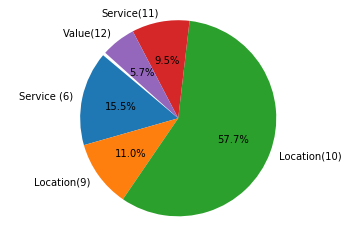

In [85]:
import matplotlib.pyplot as plt
print(ldamodel[corpus[rev1Index]])
pieChartData = []
for a, b in ldamodel[corpus[rev1Index]]:
    pieChartData.append(b)
labels = ['Service (6)', 'Location(9)', 'Location(10)', 'Service(11)', 'Value(12)']
plt.pie(pieChartData, autopct='%1.1f%%', labels=labels, startangle=140)
plt.axis('equal')
plt.show()

Aw, snap! We don't have an account for ''. Want to try again? You can authenticate with your email address or username. Sign in is not case sensitive.

Don't have an account? plot.ly

Questions? support@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

In [66]:
topicModel = ldamodel[corpus[rev1Index]]
print(topicModel)

print(dfTrain.groupby('Author').size().sort_values(ascending=False)[:5])

[(1, 0.067541883157822252), (5, 0.28859577932930786), (7, 0.20788709417179252), (11, 0.1729598020258846), (12, 0.25579228125496378)]
Author
Posted by an Accorhotels.com traveler        1088
A TripAdvisor Member                          102
Posted by an Easytobook.com traveler           62
Posted by a hotelsgrandparis.com traveler      38
David B                                        23
dtype: int64


In [48]:
davidBRevs = []
davidBTopics = []
for ind, row in dfTrain.iterrows():
    if(row['Author'] == 'David B'):
        davidBRevs.append([row['Content'], ind])
        davidBTopics.append(ldamodel[corpus[ind]])

[[(0, 0.33330100113566191), (6, 0.17924189127814374), (8, 0.072900852734309546), (11, 0.022136871326012691), (12, 0.070796756174582309), (13, 0.3134593109471524)], [(0, 0.42791761616460994), (5, 0.036125978424837425), (7, 0.067886840339641139), (11, 0.23932932467848753), (12, 0.1157811924473777), (13, 0.10430098063217502)], [(9, 0.38977307956882662), (13, 0.57451248117916731)], [(0, 0.13023382458560653), (9, 0.31472785120294511), (13, 0.53539539112899737)], [(0, 0.25338524061893836), (6, 0.13076196705272672), (8, 0.11254496366896573), (11, 0.23141015357169312), (13, 0.25792244001166964)], [(0, 0.35201112436901555), (3, 0.44438292312005467), (10, 0.18819969258300884)], [(0, 0.29442714490340738), (8, 0.082487380232527718), (11, 0.41269053356499991), (13, 0.19253770036899126)], [(0, 0.93367331787493524)], [(0, 0.089532581555453558), (2, 0.10862703639158915), (5, 0.28815075922374267), (6, 0.14390790507164716), (7, 0.31121107589148356), (10, 0.050634080007090597)], [(0, 0.27287954399423403)

In [50]:
for x in davidBTopics:
    print(x)
    print("---------------------")
for s in davidBRevs:
    print(s)
    print("---------------------------------------------")

[(0, 0.33330100113566191), (6, 0.17924189127814374), (8, 0.072900852734309546), (11, 0.022136871326012691), (12, 0.070796756174582309), (13, 0.3134593109471524)]
---------------------
[(0, 0.42791761616460994), (5, 0.036125978424837425), (7, 0.067886840339641139), (11, 0.23932932467848753), (12, 0.1157811924473777), (13, 0.10430098063217502)]
---------------------
[(9, 0.38977307956882662), (13, 0.57451248117916731)]
---------------------
[(0, 0.13023382458560653), (9, 0.31472785120294511), (13, 0.53539539112899737)]
---------------------
[(0, 0.25338524061893836), (6, 0.13076196705272672), (8, 0.11254496366896573), (11, 0.23141015357169312), (13, 0.25792244001166964)]
---------------------
[(0, 0.35201112436901555), (3, 0.44438292312005467), (10, 0.18819969258300884)]
---------------------
[(0, 0.29442714490340738), (8, 0.082487380232527718), (11, 0.41269053356499991), (13, 0.19253770036899126)]
---------------------
[(0, 0.93367331787493524)]
---------------------
[(0, 0.089532581555

In [79]:
#Selecting a representative review for each aspect for the hotel
hotelsOfInterest = dfTest.groupby('HotelId').size().sort_values(ascending=False)[4:5]
rev1Index = 0
rev2Index = 0
rev3Index = 0
rev4Index = 0
rev5Index = 0
maxAspects = 0
hotelReviews = []
for x, group in dfTest.groupby('HotelId'):
    if(x in hotelsOfInterest):
        hotelReviews = group
for ind, row in hotelReviews.iterrows():
    if(X_test[ind][2]>0.5):# and len(dfTest['Content'][ind])<800):
        maxAspects = np.count_nonzero(X_test[ind])
        rev1Index = ind
    elif(X_test[ind][3])
print(maxAspects)
print(dfTest['Content'][rev1Index])

5
July 1, 2007. We stayed at the Venetian about five years ago, and it was wonderful. Looked forward to having a suite once again. Check-in was endless, and the furnishings looked worn. We overlooked the top of a parking garage. When turning down our bed for the night, I was met with a great view of a bare blue mattress. They had thrown a few sheets on top of a very used looking mattress pad which covered just the middle of the mattress. Six inches of mattress showed at the top. The sheets were frayed. It took an hour and three calls to get housekeeping up to fix the bed. All this for $400.00. Don't go.


In [1]:
print("hello")

hello
